<a href="https://www.kaggle.com/code/kagglebenb/faker-stats?scriptVersionId=110465122" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Display the entire dataframe
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

In [3]:
# Web scraping packages
from bs4 import BeautifulSoup
import requests

# Faker Statistics

In [4]:
url = "https://lol.fandom.com/wiki/Special:RunQuery/TournamentStatistics?TS%5Bpreload%5D=PlayerByChampion&TS%5Btournament%5D=&TS%5Blink%5D=Faker&TS%5Bchampion%5D=&TS%5Brole%5D=&TS%5Bteam%5D=&TS%5Bpatch%5D=&TS%5Byear%5D=&TS%5Bregion%5D=&TS%5Btournamentlevel%5D=&TS%5Bwhere%5D=&TS%5Bincludelink%5D%5Bis_checkbox%5D=true&TS%5Bshownet%5D%5Bis_checkbox%5D=true&_run=&pfRunQueryFormName=TournamentStatistics&wpRunQuery=&pf_free_text="

In [5]:
page = requests.get(url)

In [6]:
soup = BeautifulSoup(page.text, 'html5lib')

In [7]:
faker_champ_stats_table = soup.find_all('table')[0]
faker_champ_stats_df = pd.DataFrame()

In [8]:
temp = []
for tr in faker_champ_stats_table.tr.next_siblings:
    row = [td.text for td in tr]
    temp.append(row)
faker_champ_stats_df = pd.DataFrame(temp)

In [9]:
faker_champ_stats_df

,0,1,2,3,4,...,13,14,15,16,17
0,1116 Total Games Played on 77 Champions (On ⁠⁠...,None,None,None,None,...,None,None,None,None,None
1,Champion,G,W,L,WR,...,DMG,DMG/M,KPAR,KS,GS
2,Azir,118,78,40,66.1%,...,-,-,63.8%,25.3%,22.8%
3,Ryze,77,49,28,63.6%,...,-,-,-,-,-
4,Orianna,73,47,26,64.4%,...,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...
76,Pantheon,1,0,1,0%,...,-,-,62.5%,37.5%,20.3%
77,Quinn,1,0,1,0%,...,-,-,100%,100%,25.5%
78,Singed,1,0,1,0%,...,-,-,0%,0%,20.8%
79,Overall:,-,-,-,-,...,-,-,-,-,-


In [10]:
faker_champ_stats_df.rename(columns=faker_champ_stats_df.iloc[1], inplace=True)

In [11]:
faker_champ_stats_df.drop([0,1], inplace=True)

In [12]:
faker_champ_stats_df.drop([79,80], inplace=True)

In [13]:
faker_champ_stats_df.reset_index(drop=True, inplace=True)

In [14]:
faker_champ_stats_df.columns = ['Champion', 'G', 'W', 'L', 'WR', 'K', 'D', 'A', 'KDA', 'CS', 'CS/M', 'Gold', 'G/M', 'DMG', 'DMG/M', 'KP', 'KS', 'GS']

In [15]:
faker_champ_stats_df.head(10)

,Champion,G,W,L,WR,...,DMG,DMG/M,KP,KS,GS
0,Azir,118,78,40,66.1%,...,-,-,63.8%,25.3%,22.8%
1,Ryze,77,49,28,63.6%,...,-,-,-,-,-
2,Orianna,73,47,26,64.4%,...,-,-,-,-,-
3,LeBlanc,58,48,10,82.8%,...,-,-,-,-,-
4,Galio,52,34,18,65.4%,...,-,-,72.1%,19.3%,21.3%
5,Corki,46,34,12,73.9%,...,-,-,64%,27.1%,23.4%
6,Lissandra,44,35,9,79.5%,...,-,-,-,-,-
7,Ahri,44,32,12,72.7%,...,-,-,-,-,-
8,Viktor,43,32,11,74.4%,...,-,-,69.3%,32.5%,23.4%
9,Lulu,38,23,15,60.5%,...,-,-,-,-,-


In [16]:
faker_champ_stats_df.tail(10)

,Champion,G,W,L,WR,...,DMG,DMG/M,KP,KS,GS
67,Poppy,1,1,0,100%,...,-,-,61.5%,38.5%,21.8%
68,Tryndamere,1,1,0,100%,...,12.1k,434,73.7%,42.1%,26.3%
69,Veigar,1,1,0,100%,...,13.5k,442,66.7%,38.1%,23.4%
70,Darius,1,0,1,0%,...,-,-,80%,0%,20.8%
71,Kayle,1,0,1,0%,...,-,-,-,-,-
72,Lux,1,0,1,0%,...,-,-,-,-,-
73,Nautilus,1,0,1,0%,...,-,-,75%,50%,20.2%
74,Pantheon,1,0,1,0%,...,-,-,62.5%,37.5%,20.3%
75,Quinn,1,0,1,0%,...,-,-,100%,100%,25.5%
76,Singed,1,0,1,0%,...,-,-,0%,0%,20.8%


This is a good start, but there are some missing stats. Let's try to fill in these missing stats manually. For now, let's use this as a temporary csv table.

In [17]:
faker_champ_stats_df.to_csv('faker_champ_stats_temp.csv')

Okay, so here I've used the `BeautifulSoup` package to scrape some data from the lol esports fandom wiki. There is no website I've found that just shows Faker's (or anyone elses) complete match history. Thus, I have to scrape from multiple tables and use a lot of dataframe joining to get the match history. It's not complete but I will have to do. There must be a way to piece together the information.

What I can do is get a list of tournaments Faker played in, then go to each of those tournaments, scrape the match history from those tournaments, and only look for Faker's games.

Actually, now that I think about it, I probably want to start by scraping the match history from every tournament ever. This way, I can filter the match history for certain teams and players so that things will be slightly easier in the future.

I plan to work on this a little bit every day. It may take a few years, but this seems like it'll be an interesting project.

Also, a lot of missing data. Oof. Hopefully I can use tournament data to get the results.

Welp, time to get the tournament data

In [18]:
tournament_page = requests.get("https://lol.fandom.com/wiki/Faker/Tournament_Results")
soup_tournaments = BeautifulSoup(tournament_page.text, "html5lib") # get the html

In [19]:
tournaments = pd.read_html(tournament_page.text)[3]
tournaments

Faker Tournament Results                                           \
                       Date     Pl                             Event   
0                2022-11-05      2                       Worlds 2022   
1                2022-08-28      2          LCK 2022 Summer Playoffs   
2                2022-08-14      2                   LCK 2022 Summer   
3                2022-05-29      2                          MSI 2022   
4                2022-04-02      1          LCK 2022 Spring Playoffs   
..                      ...    ...                               ...   
67               2013-09-07      1    Korea Regional Finals Season 3   
68               2013-08-31      1             Champions 2013 Summer   
69               2013-06-29  3 - 4           AMD-INVEN GamExperience   
70               2013-06-15      3             Champions 2013 Spring   
71               2013-03-23      Q  Champions 2013 Spring Qualifiers   

                                                                              
     Last Result     Team                                             Roster  
0     2 : 3⁠⁠DRX     ⁠⁠T1  Zeus, Oner, Faker, Gumayusi, Keria, Bengi, moment  
1     0 : 3⁠⁠GEN     ⁠⁠T1   Zeus, Oner, Faker, Gumayusi, Keria, Polt, moment  
2     15 - 3⁠⁠RR     ⁠⁠T1   Zeus, Oner, Faker, Gumayusi, Keria, Polt, moment  
3     2 : 3⁠⁠RNG     ⁠⁠T1   Zeus, Oner, Faker, Gumayusi, Keria, Polt, moment  
4     3 : 1⁠⁠GEN     ⁠⁠T1   Zeus, Oner, Faker, Gumayusi, Keria, Polt, moment  
..           ...      ...                                                ...  
67   3 : 1⁠⁠KT.B    ⁠⁠SKT     Impact, bengi, Faker, Piglet, PoohManDu, kkOma  
68   3 : 2⁠⁠KT.B  ⁠⁠SKT 2     Impact, bengi, Faker, Piglet, PoohManDu, kkOma  
69  0 : 2⁠⁠MVP.O  ⁠⁠SKT 2     Impact, bengi, Faker, Piglet, PoohManDu, kkOma  
70    3 : 0⁠⁠CJF  ⁠⁠SKT 2     Impact, bengi, Faker, Piglet, PoohManDu, kkOma  
71   2 : 0⁠⁠BEGG  ⁠⁠SKT 2            Impact, bengi, Faker, Piglet, PoohManDu  

[72 rows x 6 columns]

In [20]:
tournaments = tournaments.droplevel(level=0, axis=1)

I can't believe Faker has played in 70 tournaments. That's crazy. He's the GOAT for a reason.

In [21]:
# list of tournaments to scrape data from
tournaments.columns

Index(['Date', 'Pl', 'Event', 'Last Result', 'Team', 'Roster'], dtype='object')

In [22]:
tournaments['index'] = range(len(tournaments), 0, -1)
tournaments.rename(columns={'index':'Tournament Number'}, inplace=True)

In [23]:
standings = tournaments.loc[:, 'Last Result']
standing_number = 0
for standing in standings:
    index = 0
    for ch in standing:
        if ord(ch) >= 65 and ord(ch) <= 90:
            standings[standing_number] = standing[:index] + " " + standing[index:]
            break
        index += 1
    standing_number += 1
standings = standings.to_numpy()
count = 0
for standing in standings:
    standing = standing.encode('ascii', 'ignore').decode('utf-8').strip()
    # print(standing)
    temp = standing.split()
    standing = ' '.join(temp)
    standings[count] = standing
    count += 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [24]:
tournaments['Last Result'] = standings
tournaments

,Date,Pl,Event,Last Result,Team,Roster,Tournament Number
0,2022-11-05,2,Worlds 2022,2: 3 DRX,⁠⁠T1,"Zeus, Oner, Faker, Gumayusi, Keria, Bengi, moment",72
1,2022-08-28,2,LCK 2022 Summer Playoffs,0: 3 GEN,⁠⁠T1,"Zeus, Oner, Faker, Gumayusi, Keria, Polt, moment",71
2,2022-08-14,2,LCK 2022 Summer,15 - 3 RR,⁠⁠T1,"Zeus, Oner, Faker, Gumayusi, Keria, Polt, moment",70
3,2022-05-29,2,MSI 2022,2: 3 RNG,⁠⁠T1,"Zeus, Oner, Faker, Gumayusi, Keria, Polt, moment",69
4,2022-04-02,1,LCK 2022 Spring Playoffs,3: 1 GEN,⁠⁠T1,"Zeus, Oner, Faker, Gumayusi, Keria, Polt, moment",68
...,...,...,...,...,...,...,...
67,2013-09-07,1,Korea Regional Finals Season 3,3: 1 KT.B,⁠⁠SKT,"Impact, bengi, Faker, Piglet, PoohManDu, kkOma",5
68,2013-08-31,1,Champions 2013 Summer,3: 2 KT.B,⁠⁠SKT 2,"Impact, bengi, Faker, Piglet, PoohManDu, kkOma",4
69,2013-06-29,3 - 4,AMD-INVEN GamExperience,0: 2 MVP.O,⁠⁠SKT 2,"Impact, bengi, Faker, Piglet, PoohManDu, kkOma",3
70,2013-06-15,3,Champions 2013 Spring,3: 0 CJF,⁠⁠SKT 2,"Impact, bengi, Faker, Piglet, PoohManDu, kkOma",2


In [25]:
tournaments.to_csv("faker_results_tournaments.csv")

In [26]:
FAKER_GAMES_PLAYED = np.sum(faker_champ_stats_df['G'].astype(int).to_numpy())
FAKER_GAMES_PLAYED

1116

In [27]:
FAKER_GAMES_WON = np.sum(faker_champ_stats_df['W'].astype(int).to_numpy())
FAKER_GAMES_WON

757

In [28]:
FAKER_OVERALL_WINRATE = FAKER_GAMES_WON / FAKER_GAMES_PLAYED
FAKER_OVERALL_WINRATE

0.6783154121863799

Unfortunately, it seems there is no match history for the first tournament Faker played, the *Champions 2013 Spring Qualifiers*, so we will have to work without it. Luckily, we can scrape data from the next event, the *Champions 2013 Spring* tournament.

In [29]:
def get_html_table(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html5lib')
    table = soup.find_all('table')[0]
    return table

In [30]:
def get_tournament_df(table):
    temp = []
    for tr in table.tr.next_siblings:
        row = []
        for td in tr:
            anchors = td.find_all('a')
            spans = td.find_all('span')
            # print(anchors)
            if anchors:
                title = anchors[0].get('title')
                if title:
                    row.append(title)
            elif spans:
                if len(spans) == 1:
                    title = spans[0].get('title')
                    if title:
                        row.append(title)
                    else:
                        row.append(td.text)
                else:
                    lst = []
                    for span in spans:
                        title = span.get('title')
                        if title:
                            lst.append(title)
                    if lst:
                        row.append(lst)
                    else:
                        row.append(td.text)
            else:
                if td.text != "":
                    row.append(td.text)
                else:
                    row.append(pd.NA)
        temp.append(row)
    df = pd.DataFrame(temp)
    df.loc[1, 6] = 'OpponentTeam'
    
    df.rename(columns=df.iloc[1], inplace=True)
    df.drop(index=[0,1,2], inplace=True)
    df.rename(columns={'ΔCS': 'CSD'}, inplace=True)
    df.reset_index(drop=True, inplace=True)
    df.drop(index=[len(df.index) - 1], inplace = True)
    csd = df['CSD']
    new_csd = []
    for st in csd:
        st = st.replace('\u25bc', '-').replace('\u25b2', '').replace('\u25ac', '0')
        new_csd.append(int(st))
    df['CSD'] = new_csd
    df['CSD'] = df['CSD'].astype(int)
    df['SpellD'] = df['Spells'].map(lambda x: x[0])
    df['SpellF'] = df['Spells'].map(lambda x: x[1])
    df['K'] = df['K'].astype(int)
    df['D'] = df['D'].astype(int)
    df['A'] = df['A'].astype(int)
    df['G'] = pd.to_numeric(df['G'], errors='coerce').fillna(pd.NA)
    df['KDA'] = df[['K', 'D', 'A']].apply(func=(lambda x: (x['K'] + x['A']) / x['D'] if x['D'] > 0 else x['K'] + x['A']), axis=1)
    df['KDA'] = np.round(df['KDA'], decimals=2)
    df['Item1'] = df['Items'].map(lambda x: x[0])
    df['Item2'] = df['Items'].map(lambda x: x[1])
    df['Item3'] = df['Items'].map(lambda x: x[2])
    df['Item4'] = df['Items'].map(lambda x: x[3])
    df['Item5'] = df['Items'].map(lambda x: x[4])
    df['Item6'] = df['Items'].map(lambda x: x[5])
    df[['Blue', 'Red']] = df[['Side', 'Team', 'OpponentTeam']].apply(func=(lambda row: [row[1], row[2]] if row[0] == 'Blue' else [row[2], row[1]]), axis=1, result_type='expand')
    
    df.drop(columns=['Spells', 'P', 'SB', 'VOD'], inplace=True)
    
    df = df[['Date', 'Tournament', 'Team', 'OpponentTeam','W/L', 'Blue', 'Red', 'Side', 'Len', 'C', 'Vs', 'K', 'D', 'A', 'KDA', 'CS', 'G', 'Dmg', 'CSD', 'SpellD', 'SpellF','Items', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6']]
    df.rename(columns={'Len': 'Length', 'C': 'Champion', 'G': 'Gold(thousand)'}, inplace=True)
    
    return df

In [31]:
url = "https://lol.fandom.com/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=Champions%202013%20Spring&MHP%5Bspl%5D=yes&MHP%5Blink%5D=Faker&_run="

In [32]:
table = get_html_table(url)
faker_2013_spring = get_tournament_df(table)
faker_2013_spring

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2013-06-05,Champions 2013 Spring,SK Telecom T1 2,CJ Entus Frost,Win,...,Zhonya's Hourglass,Rod of Ages,Needlessly Large Rod,Sorcerer's Shoes - Homeguard,Void Staff
1,2013-06-05,Champions 2013 Spring,SK Telecom T1 2,CJ Entus Frost,Win,...,Crystalline Flask,Maw of Malmortius,Boots of Mobility - Homeguard,Last Whisper,The Black Cleaver
2,2013-06-05,Champions 2013 Spring,SK Telecom T1 2,CJ Entus Frost,Win,...,Crystalline Flask,Seeker's Armguard,Rod of Ages,Sorcerer's Shoes,Rabadon's Deathcap
3,2013-05-29,Champions 2013 Spring,SK Telecom T1 2,MVP Ozone,Loss,...,Spirit Visage,Rod of Ages,Sorcerer's Shoes - Homeguard,Void Staff,EmptyIcon
4,2013-05-29,Champions 2013 Spring,SK Telecom T1 2,MVP Ozone,Loss,...,Mejai's Soulstealer,Athene's Unholy Grail,Rabadon's Deathcap,Sorcerer's Shoes - Homeguard,Void Staff
...,...,...,...,...,...,...,...,...,...,...,...
15,2013-04-17,Champions 2013 Spring,SK Telecom T1 2,MVP Blue,Win,...,Sorcerer's Shoes - Homeguard,Blasting Wand,Doran's Ring,Doran's Ring,Crystalline Flask
16,2013-04-12,Champions 2013 Spring,SK Telecom T1 2,NaJin Sword,Loss,...,Needlessly Large Rod,Sorcerer's Shoes - Homeguard,Blasting Wand,Tear of the Goddess,Sight Ward
17,2013-04-12,Champions 2013 Spring,SK Telecom T1 2,NaJin Sword,Win,...,Lich Bane,Void Staff,Sorcerer's Shoes - Homeguard,Quicksilver Sash,Doran's Ring
18,2013-04-06,Champions 2013 Spring,SK Telecom T1 2,CJ Entus Blaze,Win,...,Rod of Ages,Seraph's Embrace,Void Staff,Sorcerer's Shoes,Chain Vest


In [33]:
faker_2013_spring.to_csv('faker_2013_spring.csv')

In [34]:
url = "https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=Champions+2013+Summer&MHP%5Blink%5D=Faker&_run="

In [35]:
table = get_html_table(url)
faker_2013_summer = get_tournament_df(table)
faker_2013_summer

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2013-08-31,Champions 2013 Summer,SK Telecom T1 2,KT Rolster Bullets,Win,...,The Black Cleaver,Last Whisper,Quicksilver Sash,Ninja Tabi,Doran's Blade
1,2013-08-31,Champions 2013 Summer,SK Telecom T1 2,KT Rolster Bullets,Win,...,Deathfire Grasp,Abyssal Scepter,Sorcerer's Shoes - Homeguard,Doran's Ring,Doran's Ring
2,2013-08-31,Champions 2013 Summer,SK Telecom T1 2,KT Rolster Bullets,Win,...,Mercury's Treads,The Brutalizer,Last Whisper,Blade of the Ruined King,EmptyIcon
3,2013-08-31,Champions 2013 Summer,SK Telecom T1 2,KT Rolster Bullets,Loss,...,Deathfire Grasp,Abyssal Scepter,Sorcerer's Shoes - Homeguard,Doran's Ring,EmptyIcon
4,2013-08-31,Champions 2013 Summer,SK Telecom T1 2,KT Rolster Bullets,Loss,...,Doran's Ring,Sorcerer's Shoes - Homeguard,Athene's Unholy Grail,Rabadon's Deathcap,EmptyIcon
...,...,...,...,...,...,...,...,...,...,...,...
13,2013-07-24,Champions 2013 Summer,SK Telecom T1,MVP Blue,Win,...,Abyssal Scepter,Void Staff,Rabadon's Deathcap,Sorcerer's Shoes - Homeguard,Needlessly Large Rod
14,2013-07-13,Champions 2013 Summer,SK Telecom T1,NaJin White Shield,Win,...,Giant's Belt,Athene's Unholy Grail,Rabadon's Deathcap,Sorcerer's Shoes - Homeguard,Void Staff
15,2013-07-13,Champions 2013 Summer,SK Telecom T1,NaJin White Shield,Win,...,Rabadon's Deathcap,Athene's Unholy Grail,Sorcerer's Shoes,Void Staff,Liandry's Torment
16,2013-07-05,Champions 2013 Summer,SK Telecom T1,Incredible Miracle 2,Win,...,Doran's Blade,The Black Cleaver,Boots of Mobility - Homeguard,Last Whisper,EmptyIcon


In [36]:
faker_2013_summer.to_csv('faker_2013_summer.csv')

In [37]:
url = "https://lol.fandom.com/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=Korea%20Regional%20Finals%20Season%203&MHP%5Bspl%5D=yes&MHP%5Blink%5D=Faker&_run="

In [38]:
table = get_html_table(url)
faker_2013_regional_finals = get_tournament_df(table)
faker_2013_regional_finals

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2013-09-07,Korea Regional Finals Season 3,SK Telecom T1,KT Rolster Bullets,Win,...,Doran's Ring,Sorcerer's Shoes,Haunting Guise,Deathfire Grasp,EmptyIcon
1,2013-09-07,Korea Regional Finals Season 3,SK Telecom T1,KT Rolster Bullets,Win,...,Athene's Unholy Grail,Sorcerer's Shoes,Amplifying Tome,Doran's Ring,Doran's Ring
2,2013-09-07,Korea Regional Finals Season 3,SK Telecom T1,KT Rolster Bullets,Win,...,Haunting Guise,Needlessly Large Rod,Void Staff,Deathfire Grasp,Rabadon's Deathcap
3,2013-09-07,Korea Regional Finals Season 3,SK Telecom T1,KT Rolster Bullets,Loss,...,Zhonya's Hourglass,Athene's Unholy Grail,Sorcerer's Shoes - Homeguard,Blasting Wand,Doran's Ring


In [39]:
faker_2013_regional_finals.to_csv('faker_2013_regional_finals.csv')

In [40]:
url = 'https://lol.fandom.com/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=World%20Championship%20Season%203&MHP%5Bspl%5D=yes&MHP%5Blink%5D=Faker&_run='

In [41]:
table = get_html_table(url)
faker_2013_worlds = get_tournament_df(table)
faker_2013_worlds

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2013-10-05,Worlds Season 3,SK Telecom T1,Royal Club,Win,...,Athene's Unholy Grail,Doran's Ring,Boots of Speed,Rabadon's Deathcap,EmptyIcon
1,2013-10-05,Worlds Season 3,SK Telecom T1,Royal Club,Win,...,Negatron Cloak,Last Whisper,Mercury's Treads - Homeguard,The Black Cleaver,Hexdrinker
2,2013-10-05,Worlds Season 3,SK Telecom T1,Royal Club,Win,...,Doran's Ring,Athene's Unholy Grail,Rabadon's Deathcap,Sorcerer's Shoes,Haunting Guise
3,2013-09-28,Worlds Season 3,SK Telecom T1,NaJin Black Sword,Win,...,Sorcerer's Shoes,Athene's Unholy Grail,Rabadon's Deathcap,Doran's Ring,Void Staff
4,2013-09-28,Worlds Season 3,SK Telecom T1,NaJin Black Sword,Win,...,Rabadon's Deathcap,Athene's Unholy Grail,Sorcerer's Shoes,Blasting Wand,Sight Ward
...,...,...,...,...,...,...,...,...,...,...,...
13,2013-09-21,Worlds Season 3,SK Telecom T1,Lemondogs,Win,...,Doran's Blade,The Black Cleaver,The Bloodthirster,Ninja Tabi,EmptyIcon
14,2013-09-18,Worlds Season 3,SK Telecom T1,TSM,Win,...,Doran's Ring,Doran's Ring,Sorcerer's Shoes,Rabadon's Deathcap,Blasting Wand
15,2013-09-18,Worlds Season 3,SK Telecom T1,GamingGear.eu,Win,...,Doran's Ring,Needlessly Large Rod,Lich Bane,Sorcerer's Shoes - Homeguard,Crystalline Flask
16,2013-09-15,Worlds Season 3,SK Telecom T1,Oh My God,Loss,...,Athene's Unholy Grail,Rabadon's Deathcap,Sorcerer's Shoes,Void Staff,Needlessly Large Rod


In [42]:
faker_2013_worlds.to_csv('faker_2013_worlds.csv')

In [43]:
url = "https://lol.fandom.com/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=Champions%202014%20Winter&MHP%5Bspl%5D=yes&MHP%5Blink%5D=Faker&_run="

In [44]:
table = get_html_table(url)
faker_2014_winter = get_tournament_df(table)
faker_2014_winter

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2014-01-25,Champions 2014 Winter,SK Telecom T1 K,Samsung Ozone,Win,...,The Brutalizer,Doran's Blade,Boots of Speed,EmptyIcon,EmptyIcon
1,2014-01-25,Champions 2014 Winter,SK Telecom T1 K,Samsung Ozone,Win,...,Rod of Ages,Seraph's Embrace,Seeker's Armguard,Sorcerer's Shoes,Null-Magic Mantle
2,2014-01-25,Champions 2014 Winter,SK Telecom T1 K,Samsung Ozone,Win,...,Last Whisper,Hexdrinker,The Brutalizer,Mercury's Treads,Negatron Cloak
3,2014-01-08,Champions 2014 Winter,SK Telecom T1 K,KT Rolster Bullets,Win,...,The Bloodthirster,The Black Cleaver,Ninja Tabi - Homeguard,Spirit Visage,Last Whisper
4,2014-01-08,Champions 2014 Winter,SK Telecom T1 K,KT Rolster Bullets,Win,...,Sorcerer's Shoes - Homeguard,Athene's Unholy Grail,Doran's Ring,Void Staff,Needlessly Large Rod
...,...,...,...,...,...,...,...,...,...,...,...
10,2013-12-07,Champions 2014 Winter,SK Telecom T1 K,CJ Entus Blaze,Win,...,Athene's Unholy Grail,Void Staff,Sorcerer's Shoes,Doran's Ring,Doran's Ring
11,2013-11-22,Champions 2014 Winter,SK Telecom T1 K,SK Telecom T1 S,Win,...,Athene's Unholy Grail,Sorcerer's Shoes,Doran's Ring,Doran's Ring,EmptyIcon
12,2013-11-22,Champions 2014 Winter,SK Telecom T1 K,SK Telecom T1 S,Win,...,Athene's Unholy Grail,Needlessly Large Rod,Sorcerer's Shoes - Homeguard,Haunting Guise,Doran's Ring
13,2013-11-15,Champions 2014 Winter,SK Telecom T1 K,Team NB,Win,...,Last Whisper,The Brutalizer,Boots of Mobility,Doran's Shield,EmptyIcon


In [45]:
faker_2014_winter.to_csv('faker_2014_winter.csv')

In [46]:
url = "https://lol.fandom.com/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=Champions%202014%20Spring&MHP%5Bspl%5D=yes&MHP%5Blink%5D=Faker&_run="

In [47]:
table = get_html_table(url)
faker_2014_spring = get_tournament_df(table)
faker_2014_spring

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2014-04-16,Champions 2014 Spring,SK Telecom T1 K,Samsung Ozone,Loss,...,Zhonya's Hourglass,Seraph's Embrace,Morellonomicon,Sorcerer's Shoes,Blasting Wand
1,2014-04-16,Champions 2014 Spring,SK Telecom T1 K,Samsung Ozone,Win,...,Zhonya's Hourglass,Void Staff,Morellonomicon,Sorcerer's Shoes - Alacrity,Aether Wisp
2,2014-04-16,Champions 2014 Spring,SK Telecom T1 K,Samsung Ozone,Loss,...,Athene's Unholy Grail,Needlessly Large Rod,Sorcerer's Shoes,Doran's Ring,Stealth Ward
3,2014-04-16,Champions 2014 Spring,SK Telecom T1 K,Samsung Ozone,Loss,...,Needlessly Large Rod,Sorcerer's Shoes,Doran's Ring,Doran's Ring,EmptyIcon
4,2014-04-09,Champions 2014 Spring,SK Telecom T1 K,SK Telecom T1 S,Win,...,Athene's Unholy Grail,Sorcerer's Shoes,Amplifying Tome,Doran's Ring,Health Potion
...,...,...,...,...,...,...,...,...,...,...,...
6,2014-03-29,Champions 2014 Spring,SK Telecom T1 K,KT Rolster Arrows,Loss,...,Rod of Ages,Blasting Wand,Doran's Ring,Sorcerer's Shoes - Homeguard,Negatron Cloak
7,2014-03-21,Champions 2014 Spring,SK Telecom T1 K,Prime Optimus,Win,...,Seraph's Embrace,Sorcerer's Shoes,Blasting Wand,Crystalline Flask,EmptyIcon
8,2014-03-21,Champions 2014 Spring,SK Telecom T1 K,Prime Optimus,Win,...,Guardian Angel,Seraph's Embrace,Void Staff,Sorcerer's Shoes - Alacrity,Glacial Shroud
9,2014-03-12,Champions 2014 Spring,SK Telecom T1 K,SK Telecom T1 S,Loss,...,Sorcerer's Shoes - Homeguard,Needlessly Large Rod,Void Staff,Athene's Unholy Grail,Rabadon's Deathcap


In [48]:
faker_2014_spring.to_csv('faker_2014_spring.csv')

In [49]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=All-Star+2014+Paris&MHP%5Blink%5D=Faker&_run='

In [50]:
table = get_html_table(url)
faker_2014_all_stars = get_tournament_df(table)
faker_2014_all_stars

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2014-05-10,All-Star 2014 Paris,SK Telecom T1 K,Fnatic,Win,...,Athene's Unholy Grail,Void Staff,Sorcerer's Shoes,Doran's Ring,EmptyIcon
1,2014-05-10,All-Star 2014 Paris,SK Telecom T1 K,Fnatic,Win,...,The Bloodthirster,Statikk Shiv,Berserker's Greaves,Pickaxe,Doran's Blade
2,2014-05-10,All-Star 2014 Paris,SK Telecom T1 K,Oh My God,Win,...,Athene's Unholy Grail,Rabadon's Deathcap,Sorcerer's Shoes,Health Potion,EmptyIcon
3,2014-05-10,All-Star 2014 Paris,SK Telecom T1 K,Oh My God,Win,...,Athene's Unholy Grail,Sorcerer's Shoes - Distortion,Lich Bane,Rabadon's Deathcap,Void Staff
4,2014-05-10,All-Star 2014 Paris,SK Telecom T1 K,Oh My God,Win,...,Lich Bane,Athene's Unholy Grail,Rabadon's Deathcap,Sorcerer's Shoes - Homeguard,Void Staff
5,2014-05-09,All-Star 2014 Paris,SK Telecom T1 K,Fnatic,Win,...,Doran's Blade,Maw of Malmortius,The Black Cleaver,Mercury's Treads - Homeguard,Last Whisper
6,2014-05-09,All-Star 2014 Paris,SK Telecom T1 K,Oh My God,Win,...,Zhonya's Hourglass,Athene's Unholy Grail,Void Staff,Sorcerer's Shoes,Doran's Ring
7,2014-05-08,All-Star 2014 Paris,SK Telecom T1 K,Cloud9,Win,...,Athene's Unholy Grail,Sorcerer's Shoes - Homeguard,Blasting Wand,Amplifying Tome,Doran's Ring
8,2014-05-08,All-Star 2014 Paris,SK Telecom T1 K,Taipei Assassins,Win,...,Lich Bane,Athene's Unholy Grail,Sorcerer's Shoes,Doran's Ring,Doran's Ring


In [51]:
faker_2014_all_stars.to_csv('faker_2014_all_stars.csv')

In [52]:
url='https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=NLB+2014+Summer&MHP%5Blink%5D=Faker&_run='

In [53]:
table = get_html_table(url)
faker_2014_nlb_summer = get_tournament_df(table)
faker_2014_nlb_summer

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2014-08-09,NLB 2014 Summer,SK Telecom T1 K,NaJin Black Sword,Win,...,The Black Cleaver,Last Whisper,Boots of Mobility - Homeguard,Sword of the Occult,Negatron Cloak
1,2014-08-09,NLB 2014 Summer,SK Telecom T1 K,NaJin Black Sword,Win,...,Zhonya's Hourglass,Athene's Unholy Grail,Void Staff,Sorcerer's Shoes - Homeguard,Doran's Ring
2,2014-08-09,NLB 2014 Summer,SK Telecom T1 K,NaJin Black Sword,Win,...,The Bloodthirster,Statikk Shiv,Mercury's Treads - Homeguard,Hexdrinker,Doran's Blade
3,2014-08-05,NLB 2014 Summer,SK Telecom T1 K,Jin Air Green Wings Stealths,Win,...,Iceborn Gauntlet,Rod of Ages,Haunting Guise,Sorcerer's Shoes,Blasting Wand
4,2014-08-05,NLB 2014 Summer,SK Telecom T1 K,Jin Air Green Wings Stealths,Loss,...,Seraph's Embrace,Athene's Unholy Grail,Void Staff,Sorcerer's Shoes - Distortion,Doran's Ring
5,2014-08-05,NLB 2014 Summer,SK Telecom T1 K,Jin Air Green Wings Stealths,Loss,...,Seraph's Embrace,Frozen Heart,Sorcerer's Shoes,Blasting Wand,Stealth Ward
6,2014-08-05,NLB 2014 Summer,SK Telecom T1 K,Jin Air Green Wings Stealths,Win,...,Blade of the Ruined King,Statikk Shiv,Mercury's Treads,Negatron Cloak,Doran's Blade
7,2014-08-05,NLB 2014 Summer,SK Telecom T1 K,Jin Air Green Wings Stealths,Win,...,Liandry's Torment,Seraph's Embrace,Athene's Unholy Grail,Void Staff,Sorcerer's Shoes - Distortion
8,2014-08-02,NLB 2014 Summer,SK Telecom T1 K,CJ Entus Frost,Win,...,Seraph's Embrace,Frozen Heart,Spectre's Cowl,Sorcerer's Shoes,Kindlegem
9,2014-08-02,NLB 2014 Summer,SK Telecom T1 K,CJ Entus Frost,Win,...,Rylai's Crystal Scepter,Seraph's Embrace,Athene's Unholy Grail,Void Staff,Sorcerer's Shoes - Distortion


In [54]:
faker_2014_nlb_summer.to_csv('faker_2014_nlb_summer.csv')

In [55]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=Champions+2014+Summer&MHP%5Blink%5D=Faker&_run='

In [56]:
table = get_html_table(url)
faker_2014_summer = get_tournament_df(table)
faker_2014_summer

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2014-07-23,Champions 2014 Summer,SK Telecom T1 K,Samsung White,Loss,...,Athene's Unholy Grail,Void Staff,Sorcerer's Shoes - Homeguard,Doran's Ring,EmptyIcon
1,2014-07-23,Champions 2014 Summer,SK Telecom T1 K,Samsung White,Loss,...,Athene's Unholy Grail,Void Staff,Sorcerer's Shoes,Doran's Ring,EmptyIcon
2,2014-07-23,Champions 2014 Summer,SK Telecom T1 K,Samsung White,Loss,...,Zhonya's Hourglass,Athene's Unholy Grail,Void Staff,Sorcerer's Shoes - Homeguard,Doran's Ring
3,2014-07-23,Champions 2014 Summer,SK Telecom T1 K,Samsung White,Win,...,Athene's Unholy Grail,Doran's Ring,Ionian Boots of Lucidity - Homeguard,Mejai's Soulstealer,Rabadon's Deathcap
4,2014-07-11,Champions 2014 Summer,SK Telecom T1 K,Incredible Miracle 1,Loss,...,Athene's Unholy Grail,Void Staff,Sorcerer's Shoes - Homeguard,Haunting Guise,Doran's Ring
5,2014-07-11,Champions 2014 Summer,SK Telecom T1 K,Incredible Miracle 1,Win,...,Athene's Unholy Grail,Void Staff,Sorcerer's Shoes,Doran's Ring,EmptyIcon
6,2014-06-27,Champions 2014 Summer,SK Telecom T1 K,Samsung Blue,Loss,...,Zhonya's Hourglass,Athene's Unholy Grail,Void Staff,Sorcerer's Shoes - Homeguard,Negatron Cloak
7,2014-06-27,Champions 2014 Summer,SK Telecom T1 K,Samsung Blue,Loss,...,Lich Bane,Athene's Unholy Grail,Void Staff,Sorcerer's Shoes - Homeguard,Negatron Cloak
8,2014-06-21,Champions 2014 Summer,SK Telecom T1 K,Incredible Miracle 2,Win,...,Athene's Unholy Grail,Needlessly Large Rod,Sorcerer's Shoes - Homeguard,Doran's Ring,Doran's Ring
9,2014-06-21,Champions 2014 Summer,SK Telecom T1 K,Incredible Miracle 2,Win,...,Athene's Unholy Grail,Sorcerer's Shoes,Blasting Wand,Doran's Ring,EmptyIcon


In [57]:
faker_2014_summer.to_csv('faker_2014_summer.csv')

In [58]:
url= 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=Korea+Regional+Finals+2014&MHP%5Blink%5D=Faker&_run='

In [59]:
table = get_html_table(url)
faker_2014_regional_finals = get_tournament_df(table)
faker_2014_regional_finals

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2014-08-30,Korea Regional Finals 2014,SK Telecom T1 K,NaJin White Shield,Loss,...,Zhonya's Hourglass,Liandry's Torment,Athene's Unholy Grail,Void Staff,Sorcerer's Shoes - Homeguard
1,2014-08-30,Korea Regional Finals 2014,SK Telecom T1 K,NaJin White Shield,Win,...,Athene's Unholy Grail,Sorcerer's Shoes,Blasting Wand,Doran's Ring,Vision Ward
2,2014-08-30,Korea Regional Finals 2014,SK Telecom T1 K,NaJin White Shield,Loss,...,Seraph's Embrace,Needlessly Large Rod,Sorcerer's Shoes - Homeguard,EmptyIcon,EmptyIcon
3,2014-08-30,Korea Regional Finals 2014,SK Telecom T1 K,NaJin White Shield,Loss,...,Zhonya's Hourglass,Banshee's Veil,Athene's Unholy Grail,Void Staff,Sorcerer's Shoes - Homeguard
4,2014-08-27,Korea Regional Finals 2014,SK Telecom T1 K,Samsung White,Loss,...,Liandry's Torment,Seraph's Embrace,Athene's Unholy Grail,Void Staff,Sorcerer's Shoes - Homeguard
5,2014-08-27,Korea Regional Finals 2014,SK Telecom T1 K,Samsung White,Loss,...,Rod of Ages,Athene's Unholy Grail,Sorcerer's Shoes,Vision Ward,EmptyIcon
6,2014-08-27,Korea Regional Finals 2014,SK Telecom T1 K,Samsung White,Loss,...,Last Whisper,The Brutalizer,Boots of Mobility - Homeguard,EmptyIcon,EmptyIcon


In [60]:
faker_2014_regional_finals.to_csv('faker_2014_regional_finals.csv')

In [61]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=Champions+2015+Spring+Preseason&MHP%5Blink%5D=Faker&_run='

In [62]:
table = get_html_table(url)
faker_2015_preseason = get_tournament_df(table)
faker_2015_preseason

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2014-12-20,Champions 2015 Spring Preseason,SK Telecom T1,Incredible Miracle,Win,...,Muramana,Ionian Boots of Lucidity,Doran's Blade,Doran's Blade,Long Sword
1,2014-12-17,Champions 2015 Spring Preseason,SK Telecom T1,Samsung Galaxy,Win,...,Athene's Unholy Grail,Void Staff,Sorcerer's Shoes - Homeguard,Mejai's Soulstealer,EmptyIcon
2,2014-12-11,Champions 2015 Spring Preseason,SK Telecom T1,NaJin e-mFire,Win,...,Rabadon's Deathcap,Void Staff,Morellonomicon,Ionian Boots of Lucidity,Doran's Ring
3,2014-12-03,Champions 2015 Spring Preseason,SK Telecom T1,HUYA Tigers,Win,...,Rabadon's Deathcap,Athene's Unholy Grail,Void Staff,Sorcerer's Shoes - Homeguard,Haunting Guise
4,2014-12-03,Champions 2015 Spring Preseason,SK Telecom T1,HUYA Tigers,Win,...,Last Whisper,Muramana,Ionian Boots of Lucidity,Vampiric Scepter,Doran's Blade


In [63]:
faker_2015_preseason.to_csv('faker_2015_preseason.csv')

In [64]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Blink%5D=Faker&MHP%5Btournament%5D=Champions+2015+Spring&MHP%5Bshowstats%5D=2015&_run='
table = get_html_table(url)
faker_2015_spring = get_tournament_df(table)
faker_2015_spring

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2015-04-11,Champions 2015 Spring,SK Telecom T1,GE Tigers,Win,...,Rylai's Crystal Scepter,Mercury's Treads - Distortion,Abyssal Scepter,Liandry's Torment,Void Staff
1,2015-04-11,Champions 2015 Spring,SK Telecom T1,GE Tigers,Win,...,Athene's Unholy Grail,Sorcerer's Shoes,Rabadon's Deathcap,Void Staff,Needlessly Large Rod
2,2015-03-28,Champions 2015 Spring,SK Telecom T1,Jin Air Green Wings,Win,...,Will of the Ancients,Spirit Visage,Void Staff,Sorcerer's Shoes - Distortion,Blasting Wand
3,2015-03-28,Champions 2015 Spring,SK Telecom T1,Jin Air Green Wings,Win,...,Liandry's Torment,Rabadon's Deathcap,Rod of Ages,Ionian Boots of Lucidity - Homeguard,Void Staff
4,2015-03-20,Champions 2015 Spring,SK Telecom T1,Incredible Miracle,Win,...,Void Staff,Abyssal Scepter,Sorcerer's Shoes - Homeguard,Morellonomicon,Rabadon's Deathcap
...,...,...,...,...,...,...,...,...,...,...,...
15,2015-01-23,Champions 2015 Spring,SK Telecom T1,Incredible Miracle,Win,...,Doran's Blade,Ionian Boots of Lucidity - Distortion,Trinity Force (0.9.25.21 - 10.22),The Bloodthirster,Pickaxe
16,2015-01-16,Champions 2015 Spring,SK Telecom T1,KT Rolster,Win,...,Morellonomicon,Sorcerer's Shoes - Homeguard,Rabadon's Deathcap,Void Staff,Amplifying Tome
17,2015-01-10,Champions 2015 Spring,SK Telecom T1,CJ Entus,Loss,...,Doran's Ring,Sorcerer's Shoes - Homeguard,Rabadon's Deathcap,Stealth Ward (1.0.0.52 - 5.22),Amplifying Tome
18,2015-01-07,Champions 2015 Spring,SK Telecom T1,NaJin e-mFire,Win,...,Doran's Ring,Sorcerer's Shoes,Morellonomicon,Rabadon's Deathcap,EmptyIcon


In [65]:
faker_2015_spring.to_csv('faker_2015_spring.csv')

In [66]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=Champions+2015+Spring+Playoffs&MHP%5Blink%5D=Faker&_run='
table = get_html_table(url)
faker_2015_spring_playoffs = get_tournament_df(table)
faker_2015_spring_playoffs

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2015-04-24,Champions 2015 Spring Playoffs,SK Telecom T1,CJ Entus,Win,...,Morellonomicon,Rabadon's Deathcap,Void Staff,Needlessly Large Rod,Sorcerer's Shoes
1,2015-04-24,Champions 2015 Spring Playoffs,SK Telecom T1,CJ Entus,Win,...,Athene's Unholy Grail,Sorcerer's Shoes - Homeguard,Rabadon's Deathcap,Void Staff,Luden's Echo
2,2015-04-24,Champions 2015 Spring Playoffs,SK Telecom T1,CJ Entus,Win,...,Athene's Unholy Grail,Doran's Ring,Rabadon's Deathcap,Sorcerer's Shoes,Lich Bane
3,2015-04-24,Champions 2015 Spring Playoffs,SK Telecom T1,CJ Entus,Loss,...,Sorcerer's Shoes - Homeguard,Morellonomicon,Rabadon's Deathcap,Mejai's Soulstealer,EmptyIcon


In [67]:
faker_2015_spring_playoffs.to_csv('faker_2015_spring_playoffs.csv')

In [68]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Blink%5D=Faker&MHP%5Btournament%5D=MSI+2015&MHP%5Bshowstats%5D=2015&_run='
table = get_html_table(url)
faker_2015_msi = get_tournament_df(table)
faker_2015_msi

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2015-05-12,MSI 2015,SK Telecom T1,EDward Gaming,Loss,...,Morellonomicon,Sorcerer's Shoes - Homeguard,Mejai's Soulstealer,Void Staff,Rabadon's Deathcap
1,2015-05-12,MSI 2015,SK Telecom T1,EDward Gaming,Win,...,Rod of Ages,Rabadon's Deathcap,Sorcerer's Shoes,Amplifying Tome,Blasting Wand
2,2015-05-10,MSI 2015,SK Telecom T1,Fnatic,Win,...,Negatron Cloak,Abyssal Scepter,Sorcerer's Shoes - Homeguard,Rabadon's Deathcap,Void Staff
3,2015-05-09,MSI 2015,SK Telecom T1,Fnatic,Loss,...,Morellonomicon,Doran's Ring,Sorcerer's Shoes - Homeguard,Void Staff,Blasting Wand
4,2015-05-09,MSI 2015,SK Telecom T1,Fnatic,Win,...,Morellonomicon,Rabadon's Deathcap,Sorcerer's Shoes,Blasting Wand,Doran's Ring
5,2015-05-09,MSI 2015,SK Telecom T1,Fnatic,Loss,...,Luden's Echo,Morellonomicon,Abyssal Scepter,Sorcerer's Shoes - Homeguard,Void Staff
6,2015-05-09,MSI 2015,SK Telecom T1,Fnatic,Win,...,Doran's Blade,Ionian Boots of Lucidity,Trinity Force (0.9.25.21 - 10.22),The Bloodthirster,Long Sword
7,2015-05-09,MSI 2015,SK Telecom T1,TSM,Win,...,Needlessly Large Rod,Sorcerer's Shoes - Distortion,Void Staff,Abyssal Scepter,Blasting Wand
8,2015-05-08,MSI 2015,SK Telecom T1,Fnatic,Win,...,Athene's Unholy Grail,Sorcerer's Shoes,Rabadon's Deathcap,Void Staff,Lich Bane
9,2015-05-07,MSI 2015,SK Telecom T1,Beşiktaş Esports,Win,...,Morellonomicon,Sorcerer's Shoes,Rabadon's Deathcap,EmptyIcon,Vision Ward


In [69]:
faker_2015_msi.to_csv('faker_2015_msi.csv')

In [70]:
url = 'https://lol.fandom.com/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=Champions%202015%20Summer&MHP%5Bspl%5D=yes&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2015_summer = get_tournament_df(table)
faker_2015_summer

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2015-08-12,Champions 2015 Summer,SK Telecom T1,NaJin e-mFire,Loss,...,Doran's Ring,Ionian Boots of Lucidity - Homeguard,Rabadon's Deathcap,Void Staff,Aether Wisp
1,2015-08-06,Champions 2015 Summer,SK Telecom T1,Samsung Galaxy,Win,...,Luden's Echo,Zhonya's Hourglass,Morellonomicon,Sorcerer's Shoes - Homeguard,Blasting Wand
2,2015-07-24,Champions 2015 Summer,SK Telecom T1,CJ Entus,Loss,...,Lich Bane,Luden's Echo,Zhonya's Hourglass,Void Staff,Ionian Boots of Lucidity - Homeguard
3,2015-07-24,Champions 2015 Summer,SK Telecom T1,CJ Entus,Loss,...,Morellonomicon,The Hex Core mk-2,Sorcerer's Shoes - Homeguard,Blasting Wand,Doran's Ring
4,2015-07-24,Champions 2015 Summer,SK Telecom T1,CJ Entus,Win,...,Zhonya's Hourglass,Morellonomicon,Sorcerer's Shoes - Homeguard,Blasting Wand,Doran's Ring
...,...,...,...,...,...,...,...,...,...,...,...
24,2015-06-03,Champions 2015 Summer,SK Telecom T1,KOO Tigers,Win,...,Seraph's Embrace,Morellonomicon,Void Staff,Sorcerer's Shoes,Doran's Ring
25,2015-06-03,Champions 2015 Summer,SK Telecom T1,KOO Tigers,Win,...,Blade of the Ruined King,Frozen Heart,Mercury's Treads,Ruby Crystal,Vision Ward
26,2015-05-29,Champions 2015 Summer,SK Telecom T1,NaJin e-mFire,Win,...,Last Whisper,Muramana,B. F. Sword,Ionian Boots of Lucidity,Doran's Blade
27,2015-05-29,Champions 2015 Summer,SK Telecom T1,NaJin e-mFire,Win,...,Luden's Echo,Seraph's Embrace,Void Staff,Mercury's Treads,Doran's Ring


In [71]:
faker_2015_summer.to_csv('faker_2015_summer.csv')

In [72]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Blink%5D=Faker&MHP%5Btournament%5D=Champions+2015+Summer+Playoffs&MHP%5Bshowstats%5D=2015&_run='
table=get_html_table(url)
faker_2015_summer_playoffs = get_tournament_df(table)
faker_2015_summer_playoffs

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2015-08-29,Champions 2015 Summer Playoffs,SK Telecom T1,KT Rolster,Win,...,Mercurial Scimitar,Randuin's Omen,Ionian Boots of Lucidity,Last Whisper,The Brutalizer
1,2015-08-29,Champions 2015 Summer Playoffs,SK Telecom T1,KT Rolster,Win,...,Abyssal Scepter,Doran's Ring,Nashor's Tooth,Mercury's Treads - Homeguard,Needlessly Large Rod
2,2015-08-29,Champions 2015 Summer Playoffs,SK Telecom T1,KT Rolster,Win,...,Nashor's Tooth,Abyssal Scepter,Sorcerer's Shoes,Rylai's Crystal Scepter,Needlessly Large Rod


In [73]:
faker_2015_summer_playoffs.to_csv('faker_2015_summer_playoffs.csv')

In [74]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Blink%5D=Faker&MHP%5Btournament%5D=World+Championship+2015&MHP%5Bshowstats%5D=2015&_run='
table=get_html_table(url)
faker_2015_worlds = get_tournament_df(table)
faker_2015_worlds

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2015-10-31,Worlds 2015,SK Telecom T1,KOO Tigers,Win,...,Doran's Ring,Mercury's Treads,Rod of Ages,Rabadon's Deathcap,Void Staff
1,2015-10-31,Worlds 2015,SK Telecom T1,KOO Tigers,Loss,...,Athene's Unholy Grail,Rabadon's Deathcap,Lich Bane,Sorcerer's Shoes - Homeguard,EmptyIcon
2,2015-10-31,Worlds 2015,SK Telecom T1,KOO Tigers,Win,...,Athene's Unholy Grail,Sorcerer's Shoes - Homeguard,Rabadon's Deathcap,Lich Bane,Void Staff
3,2015-10-31,Worlds 2015,SK Telecom T1,KOO Tigers,Win,...,Lich Bane,Rod of Ages,Ionian Boots of Lucidity - Homeguard,Rabadon's Deathcap,Blasting Wand
4,2015-10-24,Worlds 2015,SK Telecom T1,Origen,Win,...,Sorcerer's Shoes,Doran's Ring,Rod of Ages,Blasting Wand,Amplifying Tome
...,...,...,...,...,...,...,...,...,...,...,...
7,2015-10-16,Worlds 2015,SK Telecom T1,Ahq eSports Club,Win,...,Sorcerer's Shoes,Athene's Unholy Grail,Rabadon's Deathcap,Lich Bane,EmptyIcon
8,2015-10-09,Worlds 2015,SK Telecom T1,EDward Gaming,Win,...,Rod of Ages,Doran's Ring,Mercury's Treads - Distortion,Amplifying Tome,EmptyIcon
9,2015-10-03,Worlds 2015,SK Telecom T1,EDward Gaming,Win,...,Rod of Ages,Doran's Ring,Mercury's Treads - Distortion,Void Staff,Blasting Wand
10,2015-10-02,Worlds 2015,SK Telecom T1,Bangkok Titans,Win,...,Righteous Glory,Randuin's Omen,The Black Cleaver,Mercury's Treads - Distortion,Chain Vest


In [75]:
faker_2015_worlds.to_csv('faker_2015_worlds.csv')

In [76]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=KeSPA+Cup+2015&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2015_kespa = get_tournament_df(table)
faker_2015_kespa

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2015-11-13,KeSPA Cup 2015,SK Telecom T1,ESC Ever,Loss,...,Rod of Ages,Ionian Boots of Lucidity - Homeguard,Luden's Echo,Rabadon's Deathcap,Void Staff
1,2015-11-10,KeSPA Cup 2015,SK Telecom T1,SBENU Sonicboom,Win,...,Rabadon's Deathcap,Athene's Unholy Grail,Sorcerer's Shoes,Doran's Ring,EmptyIcon
2,2015-11-10,KeSPA Cup 2015,SK Telecom T1,SBENU Sonicboom,Loss,...,Rod of Ages,Void Staff,Mercury's Treads - Homeguard,Needlessly Large Rod,Blasting Wand
3,2015-11-10,KeSPA Cup 2015,SK Telecom T1,SBENU Sonicboom,Win,...,Rod of Ages,Crystalline Flask,Fiendish Codex,Chalice of Harmony,Boots of Speed


In [77]:
faker_2015_kespa.to_csv('faker_2015_kespa.csv')

In [78]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=IEM+Season+10+World+Championship&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2016_iem = get_tournament_df(table)
faker_2016_iem

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2016-03-06,IEM Season 10 World Championship,SK Telecom T1,Fnatic,Win,...,Refillable Potion,Maw of Malmortius,Mercury's Treads,Phage,EmptyIcon
1,2016-03-06,IEM Season 10 World Championship,SK Telecom T1,Fnatic,Win,...,Morellonomicon,Void Staff,Sorcerer's Shoes,Rylai's Crystal Scepter,Liandry's Torment
2,2016-03-06,IEM Season 10 World Championship,SK Telecom T1,Fnatic,Win,...,Trinity Force (0.9.25.21 - 10.22),Sorcerer's Shoes,Infinity Edge,Doran's Blade,Zeal
3,2016-03-06,IEM Season 10 World Championship,SK Telecom T1,TSM,Win,...,Refillable Potion,Mercury's Treads,The Black Cleaver,Vision Ward,Hexdrinker
4,2016-03-06,IEM Season 10 World Championship,SK Telecom T1,TSM,Win,...,Doran's Blade,Trinity Force (0.9.25.21 - 10.22),Sorcerer's Shoes,Hexdrinker,Infinity Edge
5,2016-03-05,IEM Season 10 World Championship,SK Telecom T1,Qiao Gu Reapers,Win,...,Abyssal Scepter,Ionian Boots of Lucidity,Doran's Ring,Morellonomicon,Rabadon's Deathcap
6,2016-03-05,IEM Season 10 World Championship,SK Telecom T1,Counter Logic Gaming,Win,...,Doran's Ring,Ionian Boots of Lucidity,Lich Bane,Rabadon's Deathcap,Void Staff


In [79]:
faker_2016_iem.to_csv('faker_2016_iem.csv')

In [80]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Blink%5D=Faker&MHP%5Btournament%5D=LCK+2016+Spring&MHP%5Bshowstats%5D=2016&_run='
table=get_html_table(url)
faker_2016_spring = get_tournament_df(table)
faker_2016_spring

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2016-04-08,LCK 2016 Spring,SK Telecom T1,SBENU Sonicboom,Win,...,Ionian Boots of Lucidity - Distortion,Abyssal Scepter,Needlessly Large Rod,Lich Bane,Doran's Ring
1,2016-04-08,LCK 2016 Spring,SK Telecom T1,SBENU Sonicboom,Win,...,Doran's Blade,Trinity Force (0.9.25.21 - 10.22),Infinity Edge,Sorcerer's Shoes,Rapid Firecannon
2,2016-04-06,LCK 2016 Spring,SK Telecom T1,KT Rolster,Loss,...,Rod of Ages,Ionian Boots of Lucidity - Distortion,Abyssal Scepter,Morellonomicon,Blasting Wand
3,2016-04-06,LCK 2016 Spring,SK Telecom T1,KT Rolster,Loss,...,Luden's Echo,Ionian Boots of Lucidity - Distortion,Rabadon's Deathcap,Abyssal Scepter,Void Staff
4,2016-04-02,LCK 2016 Spring,SK Telecom T1,Samsung Galaxy,Win,...,Needlessly Large Rod,Ionian Boots of Lucidity,Rabadon's Deathcap,Void Staff,Ardent Censer
...,...,...,...,...,...,...,...,...,...,...,...
35,2016-01-22,LCK 2016 Spring,SK Telecom T1,Samsung Galaxy,Win,...,Doran's Ring,Ionian Boots of Lucidity,Void Staff,Lich Bane,Rabadon's Deathcap
36,2016-01-22,LCK 2016 Spring,SK Telecom T1,Samsung Galaxy,Win,...,Trinity Force (0.9.25.21 - 10.22),Infinity Edge,Boots of Swiftness,Essence Reaver,Sterak's Gage
37,2016-01-16,LCK 2016 Spring,SK Telecom T1,Jin Air Green Wings,Loss,...,Trinity Force (0.9.25.21 - 10.22),Ionian Boots of Lucidity,Sterak's Gage,Infinity Edge,Warden's Mail
38,2016-01-13,LCK 2016 Spring,SK Telecom T1,CJ Entus,Win,...,Rabadon's Deathcap,Abyssal Scepter,Perfect Hex Core,Ionian Boots of Lucidity,Void Staff


In [81]:
faker_2016_spring.to_csv('faker_2016_spring.csv')

In [82]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Blink%5D=Faker&MHP%5Btournament%5D=LCK+2016+Spring+Playoffs&MHP%5Bshowstats%5D=2016&_run='
table=get_html_table(url)
faker_2016_spring_playoffs = get_tournament_df(table)
faker_2016_spring_playoffs

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2016-04-23,LCK 2016 Spring Playoffs,SK Telecom T1,ROX Tigers,Win,...,Void Staff,Boots of Swiftness,Abyssal Scepter,Rylai's Crystal Scepter,Rabadon's Deathcap
1,2016-04-23,LCK 2016 Spring Playoffs,SK Telecom T1,ROX Tigers,Win,...,Doran's Ring,Sorcerer's Shoes,Morellonomicon,Liandry's Torment,Void Staff
2,2016-04-23,LCK 2016 Spring Playoffs,SK Telecom T1,ROX Tigers,Loss,...,Nashor's Tooth,Abyssal Scepter,Sorcerer's Shoes,Rylai's Crystal Scepter,Void Staff
3,2016-04-23,LCK 2016 Spring Playoffs,SK Telecom T1,ROX Tigers,Win,...,Rod of Ages,Sorcerer's Shoes,Morellonomicon,Rabadon's Deathcap,Blasting Wand
4,2016-04-16,LCK 2016 Spring Playoffs,SK Telecom T1,KT Rolster,Win,...,Mejai's Soulstealer,Abyssal Scepter,Sorcerer's Shoes - Distortion,Morellonomicon,Seeker's Armguard
...,...,...,...,...,...,...,...,...,...,...,...
6,2016-04-16,LCK 2016 Spring Playoffs,SK Telecom T1,KT Rolster,Win,...,Rod of Ages,Ionian Boots of Lucidity - Distortion,Blasting Wand,Rabadon's Deathcap,Void Staff
7,2016-04-15,LCK 2016 Spring Playoffs,SK Telecom T1,Jin Air Green Wings,Win,...,Ionian Boots of Lucidity,Rabadon's Deathcap,Lich Bane,Abyssal Scepter,Void Staff
8,2016-04-15,LCK 2016 Spring Playoffs,SK Telecom T1,Jin Air Green Wings,Win,...,Abyssal Scepter,Doran's Ring,Boots of Swiftness,Rylai's Crystal Scepter,Needlessly Large Rod
9,2016-04-15,LCK 2016 Spring Playoffs,SK Telecom T1,Jin Air Green Wings,Loss,...,Rod of Ages,Rabadon's Deathcap,Ionian Boots of Lucidity - Distortion,Abyssal Scepter,Void Staff


In [83]:
faker_2016_spring_playoffs.to_csv('faker_2016_spring_playoffs.csv')

In [84]:
url='https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Blink%5D=Faker&MHP%5Btournament%5D=MSI+2016&MHP%5Bshowstats%5D=2016&_run='
table=get_html_table(url)
faker_2016_msi = get_tournament_df(table)
faker_2016_msi

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2016-05-15,MSI 2016,SK Telecom T1,Counter Logic Gaming,Win,...,Quicksilver Sash,Rod of Ages,Boots of Swiftness - Distortion,Rabadon's Deathcap,Void Staff
1,2016-05-15,MSI 2016,SK Telecom T1,Counter Logic Gaming,Win,...,Needlessly Large Rod,Nashor's Tooth,Rylai's Crystal Scepter,Sorcerer's Shoes,Void Staff
2,2016-05-15,MSI 2016,SK Telecom T1,Counter Logic Gaming,Win,...,Nashor's Tooth,Rylai's Crystal Scepter,Sorcerer's Shoes,Needlessly Large Rod,Void Staff
3,2016-05-13,MSI 2016,SK Telecom T1,Royal Never Give Up,Win,...,Refillable Potion,Boots of Swiftness - Distortion,Rod of Ages,Guardian Angel,EmptyIcon
4,2016-05-13,MSI 2016,SK Telecom T1,Royal Never Give Up,Win,...,Abyssal Scepter,Needlessly Large Rod,Lich Bane,Ionian Boots of Lucidity - Distortion,Void Staff
...,...,...,...,...,...,...,...,...,...,...,...
12,2016-05-06,MSI 2016,SK Telecom T1,Counter Logic Gaming,Loss,...,Rabadon's Deathcap,Morellonomicon,Sorcerer's Shoes - Distortion,Doran's Ring,Abyssal Scepter
13,2016-05-05,MSI 2016,SK Telecom T1,Flash Wolves,Loss,...,Sorcerer's Shoes,Nashor's Tooth,Rylai's Crystal Scepter,Abyssal Scepter,Rabadon's Deathcap
14,2016-05-05,MSI 2016,SK Telecom T1,Royal Never Give Up,Loss,...,Nashor's Tooth,Sorcerer's Shoes,Rabadon's Deathcap,Rylai's Crystal Scepter,Void Staff
15,2016-05-04,MSI 2016,SK Telecom T1,G2 Esports,Win,...,Refillable Potion,Boots of Swiftness,Rod of Ages,Rod of Ages,Needlessly Large Rod


In [85]:
faker_2016_msi.to_csv('faker_2016_msi.csv')

In [86]:
url='https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Blink%5D=Faker&MHP%5Btournament%5D=LCK+2016+Summer&MHP%5Bshowstats%5D=2016&_run='
table=get_html_table(url)
faker_2016_summer = get_tournament_df(table)
faker_2016_summer

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2016-08-05,LCK 2016 Summer,SK Telecom T1,Longzhu Gaming,Loss,...,Spirit Visage,Rylai's Crystal Scepter,Needlessly Large Rod,Ionian Boots of Lucidity,Vision Ward
1,2016-08-05,LCK 2016 Summer,SK Telecom T1,Longzhu Gaming,Loss,...,Athene's Unholy Grail,Needlessly Large Rod,Ionian Boots of Lucidity,Rabadon's Deathcap,Void Staff
2,2016-08-03,LCK 2016 Summer,SK Telecom T1,Jin Air Green Wings,Win,...,Void Staff,Rabadon's Deathcap,Perfect Hex Core,Ionian Boots of Lucidity,Rylai's Crystal Scepter
3,2016-08-03,LCK 2016 Summer,SK Telecom T1,Jin Air Green Wings,Loss,...,Void Staff,Rod of Ages,Sorcerer's Shoes,Morellonomicon,Rabadon's Deathcap
4,2016-08-03,LCK 2016 Summer,SK Telecom T1,Jin Air Green Wings,Win,...,Void Staff,Rylai's Crystal Scepter,Ionian Boots of Lucidity,Lich Bane,Needlessly Large Rod
...,...,...,...,...,...,...,...,...,...,...,...
36,2016-06-06,LCK 2016 Summer,SK Telecom T1,ROX Tigers,Win,...,Doran's Ring,Morellonomicon,Ionian Boots of Lucidity,Rod of Ages,Void Staff
37,2016-06-04,LCK 2016 Summer,SK Telecom T1,KT Rolster,Win,...,Nashor's Tooth,Void Staff,Sorcerer's Shoes,Rylai's Crystal Scepter,Rabadon's Deathcap
38,2016-06-04,LCK 2016 Summer,SK Telecom T1,KT Rolster,Win,...,Void Staff,Nashor's Tooth,Sorcerer's Shoes,Rabadon's Deathcap,Rylai's Crystal Scepter
39,2016-06-02,LCK 2016 Summer,SK Telecom T1,CJ Entus,Win,...,Nashor's Tooth,Sorcerer's Shoes,Rylai's Crystal Scepter,Needlessly Large Rod,Void Staff


In [87]:
faker_2016_summer.to_csv('faker_2016_summer.csv')

In [88]:
url='https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Blink%5D=Faker&MHP%5Btournament%5D=LCK+2016+Summer+Playoffs&MHP%5Bshowstats%5D=2016&_run='
table=get_html_table(url)
faker_2016_summer_playoffs = get_tournament_df(table)
faker_2016_summer_playoffs

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2016-08-12,LCK 2016 Summer Playoffs,SK Telecom T1,KT Rolster,Loss,...,Athene's Unholy Grail,Rabadon's Deathcap,Sorcerer's Shoes,Void Staff,Sheen
1,2016-08-12,LCK 2016 Summer Playoffs,SK Telecom T1,KT Rolster,Loss,...,Doran's Ring,Morellonomicon,Rylai's Crystal Scepter,Blasting Wand,Negatron Cloak
2,2016-08-12,LCK 2016 Summer Playoffs,SK Telecom T1,KT Rolster,Loss,...,The Dark Seal,Rod of Ages,Ionian Boots of Lucidity,Lich Bane,Corrupting Potion
3,2016-08-12,LCK 2016 Summer Playoffs,SK Telecom T1,KT Rolster,Win,...,Morellonomicon,Rylai's Crystal Scepter,Sorcerer's Shoes,Refillable Potion,Blasting Wand
4,2016-08-12,LCK 2016 Summer Playoffs,SK Telecom T1,KT Rolster,Win,...,Morellonomicon,Sorcerer's Shoes,Rylai's Crystal Scepter,Void Staff,Liandry's Torment


In [89]:
faker_2016_summer_playoffs.to_csv('faker_2016_summer_playoffs.csv')

In [90]:
url='https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Blink%5D=Faker&MHP%5Btournament%5D=World+Championship+2016&MHP%5Bshowstats%5D=2016&_run='
table=get_html_table(url)
faker_2016_worlds = get_tournament_df(table)
faker_2016_worlds

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2016-10-30,Worlds 2016,SK Telecom T1,Samsung Galaxy,Win,...,Lich Bane,Ionian Boots of Lucidity,Rabadon's Deathcap,Void Staff,Rylai's Crystal Scepter
1,2016-10-30,Worlds 2016,SK Telecom T1,Samsung Galaxy,Loss,...,Rabadon's Deathcap,Sorcerer's Shoes,Luden's Echo,Morellonomicon,Void Staff
2,2016-10-30,Worlds 2016,SK Telecom T1,Samsung Galaxy,Loss,...,Morellonomicon,Sorcerer's Shoes,Void Staff,Luden's Echo,Rabadon's Deathcap
3,2016-10-30,Worlds 2016,SK Telecom T1,Samsung Galaxy,Win,...,Needlessly Large Rod,Rod of Ages,Ionian Boots of Lucidity,Abyssal Scepter,Void Staff
4,2016-10-29,Worlds 2016,SK Telecom T1,Samsung Galaxy,Win,...,Morellonomicon,Liandry's Torment,Sorcerer's Shoes,Rabadon's Deathcap,Void Staff
...,...,...,...,...,...,...,...,...,...,...,...
15,2016-10-09,Worlds 2016,SK Telecom T1,I May,Win,...,Maw of Malmortius,Muramana,Ionian Boots of Lucidity,The Bloodthirster,Lord Dominik's Regards
16,2016-10-09,Worlds 2016,SK Telecom T1,Cloud9,Win,...,Void Staff,Rabadon's Deathcap,Abyssal Scepter,Ionian Boots of Lucidity,Rylai's Crystal Scepter
17,2016-10-03,Worlds 2016,SK Telecom T1,Flash Wolves,Loss,...,Morellonomicon,Doran's Ring,Rylai's Crystal Scepter,Void Staff,Needlessly Large Rod
18,2016-10-02,Worlds 2016,SK Telecom T1,I May,Win,...,Doran's Ring,Abyssal Scepter,Morellonomicon,Amplifying Tome,Blasting Wand


In [91]:
faker_2016_worlds.to_csv('faker_2016_worlds.csv')

In [92]:
url='https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=KeSPA+Cup+2016&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2016_kespa = get_tournament_df(table)
faker_2016_kespa

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2016-11-18,KeSPA Cup 2016,SK Telecom T1,ROX Tigers,Loss,...,Rabadon's Deathcap,Morellonomicon,Negatron Cloak,Ionian Boots of Lucidity,Void Staff
1,2016-11-18,KeSPA Cup 2016,SK Telecom T1,ROX Tigers,Loss,...,Refillable Potion,Ionian Boots of Lucidity,Rod of Ages,Abyssal Scepter,EmptyIcon
2,2016-11-14,KeSPA Cup 2016,SK Telecom T1,MVP,Win,...,Mercurial Scimitar,Ionian Boots of Lucidity,Rod of Ages,Void Staff,Rabadon's Deathcap
3,2016-11-14,KeSPA Cup 2016,SK Telecom T1,MVP,Win,...,The Dark Seal,Mercury's Treads,Spirit Visage,Rod of Ages,Rabadon's Deathcap
4,2016-11-11,KeSPA Cup 2016,SK Telecom T1,Chungnam,Win,...,Morellonomicon,Doran's Ring,Rylai's Crystal Scepter,Blasting Wand,Amplifying Tome
5,2016-11-11,KeSPA Cup 2016,SK Telecom T1,Chungnam,Win,...,Sorcerer's Shoes,Morellonomicon,Doran's Ring,Rylai's Crystal Scepter,Liandry's Torment


In [93]:
faker_2016_kespa.to_csv('faker_2016_kespa.csv')

In [94]:
url='https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Blink%5D=Faker&MHP%5Btournament%5D=LCK+2017+Spring&MHP%5Bshowstats%5D=2017&_run='
table=get_html_table(url)
faker_2017_spring = get_tournament_df(table)
faker_2017_spring

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2017-04-01,LCK 2017 Spring,SK Telecom T1,MVP,Win,...,Sorcerer's Shoes,Morellonomicon,Refillable Potion,Luden's Echo,Void Staff
1,2017-04-01,LCK 2017 Spring,SK Telecom T1,MVP,Win,...,Sorcerer's Shoes,Doran's Ring,Lich Bane,Abyssal Scepter,Void Staff
2,2017-03-29,LCK 2017 Spring,SK Telecom T1,ROX Tigers,Win,...,Morellonomicon,Mercury's Treads,Doran's Ring,Void Staff,Rabadon's Deathcap
3,2017-03-29,LCK 2017 Spring,SK Telecom T1,ROX Tigers,Loss,...,Morellonomicon,Needlessly Large Rod,Sorcerer's Shoes,Abyssal Scepter,Void Staff
4,2017-03-29,LCK 2017 Spring,SK Telecom T1,ROX Tigers,Win,...,Zhonya's Hourglass,Rod of Ages,Refillable Potion,Needlessly Large Rod,Morellonomicon
...,...,...,...,...,...,...,...,...,...,...,...
37,2017-01-24,LCK 2017 Spring,SK Telecom T1,ROX Tigers,Win,...,Doran's Ring,Refillable Potion,Abyssal Scepter,Rylai's Crystal Scepter,Rabadon's Deathcap
38,2017-01-22,LCK 2017 Spring,SK Telecom T1,Kongdoo Monster,Win,...,Zhonya's Hourglass,The Dark Seal,Refillable Potion,Mercury's Treads,Needlessly Large Rod
39,2017-01-22,LCK 2017 Spring,SK Telecom T1,Kongdoo Monster,Win,...,Trinity Force (0.9.25.21 - 10.22),Rapid Firecannon,Sorcerer's Shoes,Infinity Edge,Maw of Malmortius
40,2017-01-18,LCK 2017 Spring,SK Telecom T1,Jin Air Green Wings,Win,...,Zhonya's Hourglass,Mercury's Treads,The Dark Seal,Rabadon's Deathcap,Void Staff


In [95]:
faker_2017_spring.to_csv('faker_2017_spring.csv')

In [96]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Blink%5D=Faker&MHP%5Btournament%5D=LCK+2017+Spring+Playoffs&MHP%5Bshowstats%5D=2017&_run='
table=get_html_table(url)
faker_2017_spring_playoffs = get_tournament_df(table)
faker_2017_spring_playoffs

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2017-04-22,LCK 2017 Spring Playoffs,SK Telecom T1,KT Rolster,Win,...,Athene's Unholy Grail,Mercury's Treads,Needlessly Large Rod,Lich Bane,Void Staff
1,2017-04-22,LCK 2017 Spring Playoffs,SK Telecom T1,KT Rolster,Win,...,Athene's Unholy Grail,Rabadon's Deathcap,Sorcerer's Shoes,Ardent Censer,EmptyIcon
2,2017-04-22,LCK 2017 Spring Playoffs,SK Telecom T1,KT Rolster,Win,...,Zhonya's Hourglass,Needlessly Large Rod,Sorcerer's Shoes,Lich Bane,Void Staff


In [97]:
faker_2017_spring_playoffs.to_csv('faker_2017_spring_playoffs.csv')

In [98]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Bno-cat%5D=true&MHP%5Bshowstats%5D=2017&MHP%5Blink%5D=Faker&MHP%5Btournament%5D=MSI+2017+Play-In%2C+MSI+2017+Main+Event&_run='
table=get_html_table(url)
faker_2017_msi = get_tournament_df(table)
faker_2017_msi

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2017-05-21,MSI 2017 Main Event,SK Telecom T1,G2 Esports,Win,...,Rabadon's Deathcap,Abyssal Scepter,Sorcerer's Shoes,The Dark Seal,Void Staff
1,2017-05-21,MSI 2017 Main Event,SK Telecom T1,G2 Esports,Win,...,Abyssal Scepter,Sorcerer's Shoes,Void Staff,Morellonomicon,Rabadon's Deathcap
2,2017-05-21,MSI 2017 Main Event,SK Telecom T1,G2 Esports,Loss,...,Doran's Ring,Abyssal Scepter,Sorcerer's Shoes,Morellonomicon,Void Staff
3,2017-05-21,MSI 2017 Main Event,SK Telecom T1,G2 Esports,Win,...,Corrupting Potion,Void Staff,Rod of Ages,Seeker's Armguard,Morellonomicon
4,2017-05-19,MSI 2017 Main Event,SK Telecom T1,Flash Wolves,Win,...,Needlessly Large Rod,Morellonomicon,Void Staff,Sorcerer's Shoes,Luden's Echo
...,...,...,...,...,...,...,...,...,...,...,...
12,2017-05-12,MSI 2017 Main Event,SK Telecom T1,Flash Wolves,Win,...,Zhonya's Hourglass,Corrupting Potion,Mercury's Treads,Void Staff,Lich Bane
13,2017-05-11,MSI 2017 Main Event,SK Telecom T1,Team WE,Win,...,Luden's Echo,Morellonomicon,Void Staff,Sorcerer's Shoes,EmptyIcon
14,2017-05-11,MSI 2017 Main Event,SK Telecom T1,TSM,Win,...,Morellonomicon,Sorcerer's Shoes,Luden's Echo,Needlessly Large Rod,Void Staff
15,2017-05-10,MSI 2017 Main Event,SK Telecom T1,GIGABYTE Marines,Win,...,Zhonya's Hourglass,Corrupting Potion,Mejai's Soulstealer,Mercury's Treads,Lich Bane


In [99]:
faker_2017_msi.to_csv('faker_2017_msi.csv')

In [100]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Blink%5D=Faker&MHP%5Btournament%5D=Rift+Rivals+2017+LCK-LPL-LMS&MHP%5Bshowstats%5D=2017&_run='
table=get_html_table(url)
faker_2017_rift_rivals = get_tournament_df(table)
faker_2017_rift_rivals

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2017-07-09,Rift Rivals 2017 LCK-LPL-LMS,SK Telecom T1,Team WE,Loss,...,Morellonomicon,The Dark Seal,Rod of Ages,EmptyIcon,Amplifying Tome
1,2017-07-07,Rift Rivals 2017 LCK-LPL-LMS,SK Telecom T1,Team WE,Win,...,Doran's Ring,The Dark Seal,Rod of Ages,Blasting Wand,Morellonomicon
2,2017-07-06,Rift Rivals 2017 LCK-LPL-LMS,SK Telecom T1,Flash Wolves,Win,...,Morellonomicon,The Dark Seal,Mercury's Treads,Blasting Wand,Banshee's Veil


In [101]:
faker_2017_rift_rivals.to_csv('faker_2017_rift_rivals.csv')

In [102]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Blink%5D=Faker&MHP%5Btournament%5D=LCK+2017+Summer&MHP%5Bshowstats%5D=2017&_run='
table=get_html_table(url)
faker_2017_summer = get_tournament_df(table)
faker_2017_summer

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2017-08-06,LCK 2017 Summer,SK Telecom T1,Bbq Olivers,Win,...,Morellonomicon,Luden's Echo,Needlessly Large Rod,Void Staff,Sorcerer's Shoes
1,2017-08-06,LCK 2017 Summer,SK Telecom T1,Bbq Olivers,Win,...,Maw of Malmortius,Phantom Dancer,B. F. Sword,Ninja Tabi,The Black Cleaver
2,2017-08-06,LCK 2017 Summer,SK Telecom T1,Bbq Olivers,Loss,...,Refillable Potion,Rod of Ages,Lich Bane,Mercury's Treads,Seeker's Armguard
3,2017-08-03,LCK 2017 Summer,SK Telecom T1,KT Rolster,Win,...,Doran's Blade,Cloak of Agility,Berserker's Greaves,The Black Cleaver,Phantom Dancer
4,2017-08-03,LCK 2017 Summer,SK Telecom T1,KT Rolster,Loss,...,Berserker's Greaves,Doran's Blade,Refillable Potion,The Black Cleaver,EmptyIcon
...,...,...,...,...,...,...,...,...,...,...,...
36,2017-06-07,LCK 2017 Summer,SK Telecom T1,Longzhu Gaming,Loss,...,Corrupting Potion,The Dark Seal,Rod of Ages,Banshee's Veil,Void Staff
37,2017-06-04,LCK 2017 Summer,SK Telecom T1,Bbq Olivers,Win,...,Thornmail,The Dark Seal,Abyssal Scepter,Mercury's Treads,Frozen Heart
38,2017-06-04,LCK 2017 Summer,SK Telecom T1,Bbq Olivers,Win,...,Doran's Ring,Sorcerer's Shoes,Haunting Guise,Morellonomicon,Rylai's Crystal Scepter
39,2017-05-31,LCK 2017 Summer,SK Telecom T1,Samsung Galaxy,Loss,...,The Dark Seal,Frozen Heart,Mercury's Treads,Abyssal Scepter,Aegis of the Legion


In [103]:
faker_2017_summer.to_csv('faker_2017_summer.csv')

In [104]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Blink%5D=Faker&MHP%5Btournament%5D=LCK+2017+Summer+Playoffs&MHP%5Bshowstats%5D=2017&_run='
table=get_html_table(url)
faker_2017_summer_playoffs = get_tournament_df(table)
faker_2017_summer_playoffs

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2017-08-26,LCK 2017 Summer Playoffs,SK Telecom T1,Longzhu Gaming,Loss,...,Trinity Force (0.9.25.21 - 10.22),Rapid Firecannon,Sorcerer's Shoes,Refillable Potion,Control Ward
1,2017-08-26,LCK 2017 Summer Playoffs,SK Telecom T1,Longzhu Gaming,Win,...,Corrupting Potion,The Dark Seal,Mercury's Treads,Lich Bane,Seeker's Armguard
2,2017-08-26,LCK 2017 Summer Playoffs,SK Telecom T1,Longzhu Gaming,Loss,...,Zhonya's Hourglass,Rabadon's Deathcap,Lich Bane,Mercury's Treads,The Dark Seal
3,2017-08-26,LCK 2017 Summer Playoffs,SK Telecom T1,Longzhu Gaming,Loss,...,Corrupting Potion,Mercury's Treads,Morellonomicon,Amplifying Tome,Blasting Wand
4,2017-08-19,LCK 2017 Summer Playoffs,SK Telecom T1,KT Rolster,Win,...,Trinity Force (0.9.25.21 - 10.22),Infinity Edge,Sorcerer's Shoes,Rapid Firecannon,EmptyIcon
...,...,...,...,...,...,...,...,...,...,...,...
9,2017-08-15,LCK 2017 Summer Playoffs,SK Telecom T1,Samsung Galaxy,Win,...,Berserker's Greaves,Hexdrinker,The Black Cleaver,Refillable Potion,Phantom Dancer
10,2017-08-15,LCK 2017 Summer Playoffs,SK Telecom T1,Samsung Galaxy,Win,...,Zhonya's Hourglass,Void Staff,Rabadon's Deathcap,Lich Bane,Mercury's Treads
11,2017-08-15,LCK 2017 Summer Playoffs,SK Telecom T1,Samsung Galaxy,Win,...,Infinity Edge,Caulfield's Warhammer,Berserker's Greaves,The Black Cleaver,Phantom Dancer
12,2017-08-12,LCK 2017 Summer Playoffs,SK Telecom T1,Afreeca Freecs,Win,...,Needlessly Large Rod,Abyssal Mask,The Dark Seal,Morellonomicon,Void Staff


In [105]:
faker_2017_summer_playoffs.to_csv('faker_2017_summer_playoffs.csv')

In [106]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Blink%5D=Faker&MHP%5Btournament%5D=Worlds+2017+Main+Event&MHP%5Bshowstats%5D=2017&_run='
table=get_html_table(url)
faker_2017_worlds = get_tournament_df(table)
faker_2017_worlds

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2017-11-04,Worlds 2017 Main Event,SK Telecom T1,Samsung Galaxy,Loss,...,Athene's Unholy Grail,Mercury's Treads,Ardent Censer,Rabadon's Deathcap,Void Staff
1,2017-11-04,Worlds 2017 Main Event,SK Telecom T1,Samsung Galaxy,Loss,...,Quicksilver Sash,Rod of Ages,Ionian Boots of Lucidity,Needlessly Large Rod,Morellonomicon
2,2017-11-04,Worlds 2017 Main Event,SK Telecom T1,Samsung Galaxy,Loss,...,Quicksilver Sash,Void Staff,Rod of Ages,Morellonomicon,Doran's Ring
3,2017-10-28,Worlds 2017 Main Event,SK Telecom T1,Royal Never Give Up,Win,...,Gargoyle Stoneplate,Liandry's Torment,Ninja Tabi,Adaptive Helm,Frozen Heart
4,2017-10-28,Worlds 2017 Main Event,SK Telecom T1,Royal Never Give Up,Win,...,Thornmail,Negatron Cloak,Mercury's Treads,Adaptive Helm,Frozen Heart
...,...,...,...,...,...,...,...,...,...,...,...
14,2017-10-15,Worlds 2017 Main Event,SK Telecom T1,Cloud9,Win,...,Zhonya's Hourglass,Needlessly Large Rod,Lich Bane,Mercury's Treads,Void Staff
15,2017-10-15,Worlds 2017 Main Event,SK Telecom T1,Ahq eSports Club,Loss,...,Needlessly Large Rod,Rod of Ages,Mercury's Treads,Lich Bane,Void Staff
16,2017-10-07,Worlds 2017 Main Event,SK Telecom T1,Ahq eSports Club,Win,...,Zhonya's Hourglass,Lich Bane,Mercury's Treads,The Dark Seal,Void Staff
17,2017-10-06,Worlds 2017 Main Event,SK Telecom T1,EDward Gaming,Win,...,Void Staff,Liandry's Torment,Sorcerer's Shoes,Morellonomicon,Rabadon's Deathcap


In [107]:
faker_2017_worlds.to_csv('faker_2017_worlds.csv')

In [108]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=KeSPA+Cup+2017&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2017_kespa = get_tournament_df(table)
faker_2017_kespa

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2017-12-01,KeSPA Cup 2017,SK Telecom T1,Longzhu Gaming,Loss,...,Morellonomicon,Liandry's Torment,Ionian Boots of Lucidity,Void Staff,Needlessly Large Rod
1,2017-12-01,KeSPA Cup 2017,SK Telecom T1,Longzhu Gaming,Loss,...,Ionian Boots of Lucidity,Liandry's Torment,The Dark Seal,Morellonomicon,Control Ward
2,2017-11-29,KeSPA Cup 2017,SK Telecom T1,Griffin (Korean Team),Win,...,Sorcerer's Shoes,Nashor's Tooth,Void Staff,Banshee's Veil,Rabadon's Deathcap
3,2017-11-29,KeSPA Cup 2017,SK Telecom T1,Griffin (Korean Team),Loss,...,Sorcerer's Shoes,Morellonomicon,Banshee's Veil,Void Staff,Rabadon's Deathcap
4,2017-11-29,KeSPA Cup 2017,SK Telecom T1,Griffin (Korean Team),Win,...,Morellonomicon,Mercury's Treads,Liandry's Torment,Banshee's Veil,Rabadon's Deathcap


In [109]:
faker_2017_kespa.to_csv('faker_2017_kespa.csv')

In [110]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=All-Star+2017+Los+Angeles&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2017_all_stars = get_tournament_df(table)
faker_2017_all_stars

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2017-12-10,All-Star 2017 Los Angeles,LCK Allstars,LPL Allstars,Loss,...,Nashor's Tooth,Sorcerer's Shoes,Void Staff,Haunting Guise,Rabadon's Deathcap
1,2017-12-10,All-Star 2017 Los Angeles,LCK Allstars,LPL Allstars,Win,...,Mercury's Treads,Morellonomicon,Void Staff,Liandry's Torment,Rabadon's Deathcap
2,2017-12-10,All-Star 2017 Los Angeles,LCK Allstars,LPL Allstars,Loss,...,Nashor's Tooth,Sorcerer's Shoes,Banshee's Veil,Needlessly Large Rod,Liandry's Torment
3,2017-12-09,All-Star 2017 Los Angeles,LCK Allstars,TCL Allstars,Win,...,Needlessly Large Rod,Mercury's Treads,Rod of Ages,Morellonomicon,Control Ward
4,2017-12-08,All-Star 2017 Los Angeles,LCK Allstars,LMS Allstars,Loss,...,Mercury's Treads,Control Ward,Morellonomicon,Banshee's Veil,Void Staff
5,2017-12-07,All-Star 2017 Los Angeles,LCK Allstars,EU LCS Allstars,Win,...,Morellonomicon,Doran's Ring,Liandry's Torment,Ionian Boots of Lucidity,EmptyIcon


In [111]:
faker_2017_all_stars.to_csv('faker_2017_all_stars.csv')

In [112]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Blink%5D=Faker&MHP%5Btournament%5D=LCK+2018+Spring&MHP%5Bshowstats%5D=2018&_run='
table=get_html_table(url)
faker_2018_spring = get_tournament_df(table)
faker_2018_spring

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2018-03-25,LCK 2018 Spring,SK Telecom T1,Kongdoo Monster,Win,...,Banner of Command,Rod of Ages,Doran's Ring,Void Staff,Ionian Boots of Lucidity
1,2018-03-25,LCK 2018 Spring,SK Telecom T1,Kongdoo Monster,Loss,...,Doran's Ring,Sorcerer's Shoes,Banshee's Veil,The Dark Seal,Blasting Wand
2,2018-03-25,LCK 2018 Spring,SK Telecom T1,Kongdoo Monster,Win,...,Doran's Ring,Minion Dematerializer,Liandry's Torment,Morellonomicon,Sorcerer's Shoes
3,2018-03-22,LCK 2018 Spring,SK Telecom T1,MVP,Win,...,Rod of Ages,Luden's Echo,Ninja Tabi,Doran's Ring,Control Ward
4,2018-03-22,LCK 2018 Spring,SK Telecom T1,MVP,Win,...,Morellonomicon,Sorcerer's Shoes,Nashor's Tooth,Needlessly Large Rod,Needlessly Large Rod
...,...,...,...,...,...,...,...,...,...,...,...
41,2018-01-20,LCK 2018 Spring,SK Telecom T1,Jin Air Green Wings,Loss,...,Morellonomicon,Void Staff,Rod of Ages,Rabadon's Deathcap,Sorcerer's Shoes
42,2018-01-20,LCK 2018 Spring,SK Telecom T1,Jin Air Green Wings,Win,...,Rabadon's Deathcap,Morellonomicon,Rod of Ages,Mercury's Treads,Void Staff
43,2018-01-17,LCK 2018 Spring,SK Telecom T1,ROX Tigers,Win,...,Zhonya's Hourglass,Blasting Wand,Rod of Ages,Mercury's Treads,Morellonomicon
44,2018-01-17,LCK 2018 Spring,SK Telecom T1,ROX Tigers,Loss,...,Control Ward,Morellonomicon,Abyssal Mask,Ionian Boots of Lucidity,Needlessly Large Rod


In [113]:
faker_2018_spring.to_csv('faker_2018_spring.csv')

In [114]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Blink%5D=Faker&MHP%5Btournament%5D=LCK+2018+Spring+Playoffs&MHP%5Bshowstats%5D=2018&_run='
table=get_html_table(url)
faker_2018_spring_playoffs = get_tournament_df(table)
faker_2018_spring_playoffs

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2018-04-04,LCK 2018 Spring Playoffs,SK Telecom T1,KT Rolster,Loss,...,Sorcerer's Shoes,Nashor's Tooth,Blasting Wand,Morellonomicon,Rabadon's Deathcap
1,2018-04-04,LCK 2018 Spring Playoffs,SK Telecom T1,KT Rolster,Loss,...,Rod of Ages,Lost Chapter,Mercury's Treads,Doran's Ring,Morellonomicon
2,2018-04-04,LCK 2018 Spring Playoffs,SK Telecom T1,KT Rolster,Loss,...,Abyssal Mask,Luden's Echo,Ninja Tabi,Doran's Ring,EmptyIcon
3,2018-04-04,LCK 2018 Spring Playoffs,SK Telecom T1,KT Rolster,Win,...,Nashor's Tooth,Sorcerer's Shoes,Morellonomicon,Void Staff,Fiendish Codex
4,2018-03-31,LCK 2018 Spring Playoffs,SK Telecom T1,KSV eSports,Win,...,Rod of Ages,Luden's Echo,Mercury's Treads,The Dark Seal,Blasting Wand
5,2018-03-31,LCK 2018 Spring Playoffs,SK Telecom T1,KSV eSports,Loss,...,Luden's Echo,Mercury's Treads,Void Staff,Rod of Ages,Rabadon's Deathcap
6,2018-03-31,LCK 2018 Spring Playoffs,SK Telecom T1,KSV eSports,Win,...,Luden's Echo,Void Staff,Sorcerer's Shoes,Rod of Ages,Needlessly Large Rod


In [115]:
faker_2018_spring_playoffs.to_csv('faker_2018_spring_playoffs.csv')

In [116]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=Asian+Games+2018+Q+-+EA&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2018_asian_games = get_tournament_df(table)
faker_2018_asian_games

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2018-06-10,Asian Games 2018 Q - East,South Korea (National Team),Chinese Taipei (National Team),Win,...,Broken Stopwatch,Infinity Edge,Phantom Dancer,B. F. Sword,Berserker's Greaves
1,2018-06-10,Asian Games 2018 Q - East,South Korea (National Team),China (National Team),Win,...,Blasting Wand,Mercury's Treads,Rod of Ages,The Dark Seal,Lost Chapter
2,2018-06-10,Asian Games 2018 Q - East,South Korea (National Team),China (National Team),Loss,...,Liandry's Torment,Rylai's Crystal Scepter,Ninja Tabi,The Dark Seal,Fiendish Codex
3,2018-06-10,Asian Games 2018 Q - East,South Korea (National Team),Chinese Taipei (National Team),Win,...,Banner of Command,Ardent Censer,Lich Bane,Sorcerer's Shoes,Void Staff
4,2018-06-09,Asian Games 2018 Q - East,South Korea (National Team),Hong Kong (National Team),Win,...,Void Staff,Banshee's Veil,Rod of Ages,Mercury's Treads,Needlessly Large Rod
...,...,...,...,...,...,...,...,...,...,...,...
7,2018-06-09,Asian Games 2018 Q - East,South Korea (National Team),China (National Team),Win,...,Berserker's Greaves,Phantom Dancer,Infinity Edge,B. F. Sword,Guardian Angel
8,2018-06-09,Asian Games 2018 Q - East,South Korea (National Team),Chinese Taipei (National Team),Loss,...,Berserker's Greaves,Infinity Edge,Phantom Dancer,Doran's Blade,Vampiric Scepter
9,2018-06-08,Asian Games 2018 Q - East,South Korea (National Team),Hong Kong (National Team),Win,...,Luden's Echo,Ardent Censer,Lich Bane,Rabadon's Deathcap,Mercury's Treads
10,2018-06-08,Asian Games 2018 Q - East,South Korea (National Team),Macau (National Team),Win,...,Berserker's Greaves,Refillable Potion,Phantom Dancer,Infinity Edge,B. F. Sword


In [117]:
faker_2018_asian_games.to_csv('faker_2018_asian_games.csv')

In [118]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Blink%5D=Faker&MHP%5Btournament%5D=Rift+Rivals+2018+LCK-LPL-LMS&MHP%5Bshowstats%5D=2018&_run='
table=get_html_table(url)
faker_2018_rift_rivals = get_tournament_df(table)
faker_2018_rift_rivals

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2018-07-08,Rift Rivals 2018 LCK-LPL-LMS,SK Telecom T1,Royal Never Give Up,Loss,...,Zhonya's Hourglass,Targon's Brace,Ninja Tabi,Refillable Potion,Haunting Guise
1,2018-07-07,Rift Rivals 2018 LCK-LPL-LMS,SK Telecom T1,Flash Wolves,Win,...,The Dark Seal,Rod of Ages,Sorcerer's Shoes,Luden's Echo,Void Staff
2,2018-07-06,Rift Rivals 2018 LCK-LPL-LMS,SK Telecom T1,Invictus Gaming,Loss,...,Berserker's Greaves,Phantom Dancer,Doran's Blade,B. F. Sword,Control Ward
3,2018-07-05,Rift Rivals 2018 LCK-LPL-LMS,SK Telecom T1,Machi Esports,Win,...,Rabadon's Deathcap,The Dark Seal,Rod of Ages,Mercury's Treads,Luden's Echo


In [119]:
faker_2018_rift_rivals.to_csv('faker_2018_rift_rivals.csv')

In [120]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Blink%5D=Faker&MHP%5Btournament%5D=LCK+2018+Summer&MHP%5Bshowstats%5D=2018&_run='
table=get_html_table(url)
faker_2018_summer = get_tournament_df(table)
faker_2018_summer

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2018-08-09,LCK 2018 Summer,SK Telecom T1,Kingzone DragonX,Loss,...,Spellbinder,Mercury's Treads,Void Staff,Fiendish Codex,Rabadon's Deathcap
1,2018-07-19,LCK 2018 Summer,SK Telecom T1,KT Rolster,Loss,...,Spellbinder,Zhonya's Hourglass,Ionian Boots of Lucidity,EmptyIcon,EmptyIcon
2,2018-07-19,LCK 2018 Summer,SK Telecom T1,KT Rolster,Loss,...,The Dark Seal,Luden's Echo,Sorcerer's Shoes,Rod of Ages,Morellonomicon
3,2018-07-19,LCK 2018 Summer,SK Telecom T1,KT Rolster,Win,...,Rod of Ages,Stopwatch,Ionian Boots of Lucidity,Void Staff,Needlessly Large Rod
4,2018-07-17,LCK 2018 Summer,SK Telecom T1,MVP,Win,...,Rod of Ages,Morellonomicon,The Dark Seal,Sorcerer's Shoes,Blasting Wand
...,...,...,...,...,...,...,...,...,...,...,...
20,2018-06-22,LCK 2018 Summer,SK Telecom T1,Griffin (Korean Team),Loss,...,Phantom Dancer,Berserker's Greaves,Infinity Edge,Guardian Angel,Control Ward
21,2018-06-15,LCK 2018 Summer,SK Telecom T1,Gen.G,Loss,...,Refillable Potion,Ardent Censer,Boots of Swiftness,Crystalline Bracer,Control Ward
22,2018-06-15,LCK 2018 Summer,SK Telecom T1,Gen.G,Loss,...,Banner of Command,Needlessly Large Rod,Mercury's Treads,Luden's Echo,Needlessly Large Rod
23,2018-06-13,LCK 2018 Summer,SK Telecom T1,Afreeca Freecs,Loss,...,Targon's Brace,Brawler's Gloves,Trinity Force (0.9.25.21 - 10.22),Sterak's Gage,Ninja Tabi


In [121]:
faker_2018_summer.to_csv('faker_2018_summer.csv')

In [122]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Blink%5D=Faker&MHP%5Btournament%5D=Korea+Regional+Finals+2018&MHP%5Bshowstats%5D=2018&_run='
table=get_html_table(url)
faker_2018_regional_finals = get_tournament_df(table)
faker_2018_regional_finals

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2018-09-12,Korea Regional Finals 2018,SK Telecom T1,Gen.G,Loss,...,Zhonya's Hourglass,Mercury's Treads,The Dark Seal,Blasting Wand,Control Ward
1,2018-09-12,Korea Regional Finals 2018,SK Telecom T1,Gen.G,Loss,...,Luden's Echo,Morellonomicon,Void Staff,Fiendish Codex,Sorcerer's Shoes
2,2018-09-12,Korea Regional Finals 2018,SK Telecom T1,Gen.G,Win,...,Trinity Force (0.9.25.21 - 10.22),Mercury's Treads,Wit's End,Control Ward,EmptyIcon
3,2018-09-12,Korea Regional Finals 2018,SK Telecom T1,Gen.G,Loss,...,Luden's Echo,Mercury's Treads,The Dark Seal,Ardent Censer,EmptyIcon
4,2018-09-12,Korea Regional Finals 2018,SK Telecom T1,Gen.G,Win,...,Sorcerer's Shoes,Morellonomicon,Nashor's Tooth,Void Staff,Control Ward


In [123]:
faker_2018_regional_finals.to_csv('faker_2018_regional_finals.csv')

In [124]:
url='https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=KeSPA+Cup+2018&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2018_kespa_cup = get_tournament_df(table)
faker_2018_kespa_cup

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2018-12-27,KeSPA Cup 2018,SK Telecom T1,DAMWON Gaming,Loss,...,Nashor's Tooth,Banshee's Veil,Sorcerer's Shoes,Rabadon's Deathcap,EmptyIcon
1,2018-12-27,KeSPA Cup 2018,SK Telecom T1,DAMWON Gaming,Loss,...,Zhonya's Hourglass,Luden's Echo,Morellonomicon,Mejai's Soulstealer,Sorcerer's Shoes
2,2018-12-27,KeSPA Cup 2018,SK Telecom T1,DAMWON Gaming,Win,...,Zhonya's Hourglass,Morellonomicon,The Dark Seal,Blasting Wand,Mercury's Treads
3,2018-12-25,KeSPA Cup 2018,SK Telecom T1,Bbq Olivers,Win,...,Zhonya's Hourglass,Hextech Protobelt-01,Ionian Boots of Lucidity,Blasting Wand,Control Ward
4,2018-12-25,KeSPA Cup 2018,SK Telecom T1,Bbq Olivers,Win,...,Mercury's Treads,Seeker's Armguard,Fiendish Codex,Corrupting Potion,The Dark Seal
5,2018-12-20,KeSPA Cup 2018,SK Telecom T1,APK Prince,Win,...,Zhonya's Hourglass,Hextech Protobelt-01,Mejai's Soulstealer,Ionian Boots of Lucidity,Corrupting Potion
6,2018-12-20,KeSPA Cup 2018,SK Telecom T1,APK Prince,Win,...,Hextech Protobelt-01,Mejai's Soulstealer,Ionian Boots of Lucidity,Blasting Wand,Corrupting Potion


In [125]:
faker_2018_kespa_cup.to_csv('faker_2018_kespa_cup.csv')

In [126]:
url='https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Blink%5D=Faker&MHP%5Btournament%5D=LCK+2019+Spring&MHP%5Bshowstats%5D=2019&_run='
table=get_html_table(url)
faker_2019_spring = get_tournament_df(table)
faker_2019_spring

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2019-03-30,LCK 2019 Spring,SK Telecom T1,Afreeca Freecs,Win,...,Banshee's Veil,Morellonomicon,Sorcerer's Shoes,Nashor's Tooth,Liandry's Torment
1,2019-03-30,LCK 2019 Spring,SK Telecom T1,Afreeca Freecs,Win,...,Luden's Echo,Banshee's Veil,Mercury's Treads,Morellonomicon,The Dark Seal
2,2019-03-28,LCK 2019 Spring,SK Telecom T1,Jin Air Green Wings,Win,...,Sterak's Gage,Ninja Tabi,Frozen Heart,Thornmail,Negatron Cloak
3,2019-03-28,LCK 2019 Spring,SK Telecom T1,Jin Air Green Wings,Win,...,Zhonya's Hourglass,Sorcerer's Shoes,Lost Chapter,Control Ward,Morellonomicon
4,2019-03-22,LCK 2019 Spring,SK Telecom T1,SANDBOX Gaming,Win,...,Morellonomicon,The Dark Seal,Luden's Echo,Fiendish Codex,Sorcerer's Shoes
...,...,...,...,...,...,...,...,...,...,...,...
39,2019-01-24,LCK 2019 Spring,SK Telecom T1,SANDBOX Gaming,Win,...,Zhonya's Hourglass,Mejai's Soulstealer,Oblivion Orb,Sorcerer's Shoes,Needlessly Large Rod
40,2019-01-18,LCK 2019 Spring,SK Telecom T1,Afreeca Freecs,Win,...,Corrupting Potion,Broken Stopwatch,Mercury's Treads,The Black Cleaver,Adaptive Helm
41,2019-01-18,LCK 2019 Spring,SK Telecom T1,Afreeca Freecs,Win,...,Gargoyle Stoneplate,Warden's Mail,Mercury's Treads,The Black Cleaver,Ruby Crystal
42,2019-01-16,LCK 2019 Spring,SK Telecom T1,Jin Air Green Wings,Win,...,Gargoyle Stoneplate,The Black Cleaver,EmptyIcon,Mercury's Treads,Warden's Mail


In [127]:
faker_2019_spring.to_csv('faker_2019_spring.csv')

In [128]:
url='https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Blink%5D=Faker&MHP%5Btournament%5D=LCK+2019+Spring+Playoffs&MHP%5Bshowstats%5D=2019&_run='
table=get_html_table(url)
faker_2019_spring_playoffs = get_tournament_df(table)
faker_2019_spring_playoffs

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2019-04-13,LCK 2019 Spring Playoffs,SK Telecom T1,Griffin (Korean Team),Win,...,Broken Stopwatch,Mercury's Treads,Banshee's Veil,Morellonomicon,Amplifying Tome
1,2019-04-13,LCK 2019 Spring Playoffs,SK Telecom T1,Griffin (Korean Team),Win,...,Nashor's Tooth,Sorcerer's Shoes,Morellonomicon,Needlessly Large Rod,Control Ward
2,2019-04-13,LCK 2019 Spring Playoffs,SK Telecom T1,Griffin (Korean Team),Win,...,Rabadon's Deathcap,Banshee's Veil,Mercury's Treads,Void Staff,Control Ward
3,2019-04-07,LCK 2019 Spring Playoffs,SK Telecom T1,Kingzone DragonX,Win,...,Zhonya's Hourglass,Rabadon's Deathcap,Morellonomicon,Sorcerer's Shoes,EmptyIcon
4,2019-04-07,LCK 2019 Spring Playoffs,SK Telecom T1,Kingzone DragonX,Win,...,Zhonya's Hourglass,Luden's Echo,Mercury's Treads,Rabadon's Deathcap,Void Staff
5,2019-04-07,LCK 2019 Spring Playoffs,SK Telecom T1,Kingzone DragonX,Win,...,Zhonya's Hourglass,Rabadon's Deathcap,Sorcerer's Shoes,Luden's Echo,EmptyIcon


In [129]:
faker_2019_spring_playoffs.to_csv('faker_2019_spring_playoffs.csv')

In [130]:
url='https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=MSI+2019+Play-In%2C+MSI+2019+Main+Event&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2019_msi = get_tournament_df(table)
faker_2019_msi

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2019-05-18,MSI 2019 Main Event,SK Telecom T1,G2 Esports,Loss,...,Mercury's Treads,The Dark Seal,Doran's Ring,Luden's Echo,Fiendish Codex
1,2019-05-18,MSI 2019 Main Event,SK Telecom T1,G2 Esports,Loss,...,Zhonya's Hourglass,Blasting Wand,Mercury's Treads,Luden's Echo,Needlessly Large Rod
2,2019-05-18,MSI 2019 Main Event,SK Telecom T1,G2 Esports,Win,...,Zhonya's Hourglass,Stopwatch,Luden's Echo,Needlessly Large Rod,Mercury's Treads
3,2019-05-18,MSI 2019 Main Event,SK Telecom T1,G2 Esports,Loss,...,Broken Stopwatch,Mercury's Treads,Seeker's Armguard,Hextech Protobelt-01,Luden's Echo
4,2019-05-18,MSI 2019 Main Event,SK Telecom T1,G2 Esports,Win,...,Corrupting Potion,Broken Stopwatch,Seeker's Armguard,Mercury's Treads,Luden's Echo
...,...,...,...,...,...,...,...,...,...,...,...
10,2019-05-12,MSI 2019 Main Event,SK Telecom T1,Team Liquid,Win,...,Broken Stopwatch,Morellonomicon,Sorcerer's Shoes,Seeker's Armguard,Void Staff
11,2019-05-11,MSI 2019 Main Event,SK Telecom T1,Invictus Gaming,Loss,...,Phage,Doran's Blade,Mercury's Treads,EmptyIcon,Sheen
12,2019-05-11,MSI 2019 Main Event,SK Telecom T1,Phong Vũ Buffalo,Win,...,Null-Magic Mantle,Trinity Force (0.9.25.21 - 10.22),Rapid Firecannon,Sorcerer's Shoes,Control Ward
13,2019-05-10,MSI 2019 Main Event,SK Telecom T1,Flash Wolves,Win,...,Wit's End,Trinity Force (0.9.25.21 - 10.22),Control Ward,Mercury's Treads,EmptyIcon


In [131]:
faker_2019_msi.to_csv('faker_2019_msi.csv')

In [132]:
url='https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=Rift+Rivals+2019+LCK-LPL-LMS-VCS&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2019_rift_rivals = get_tournament_df(table)
faker_2019_rift_rivals

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2019-07-07,Rift Rivals 2019 LCK-LPL-LMS-VCS,SK Telecom T1,Top Esports,Win,...,Twin Shadows,Zhonya's Hourglass,The Dark Seal,Mercury's Treads,Needlessly Large Rod
1,2019-07-05,Rift Rivals 2019 LCK-LPL-LMS-VCS,SK Telecom T1,Invictus Gaming,Loss,...,Luden's Echo,Sorcerer's Shoes,Void Staff,Nashor's Tooth,Banshee's Veil
2,2019-07-04,Rift Rivals 2019 LCK-LPL-LMS-VCS,SK Telecom T1,Flash Wolves,Win,...,Twin Shadows,Zhonya's Hourglass,Control Ward,Mercury's Treads,Needlessly Large Rod


In [133]:
faker_2019_rift_rivals.to_csv('faker_2019_rift_rivals.csv')

In [134]:
url='https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=LCK+2019+Summer&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2019_summer = get_tournament_df(table)
faker_2019_summer

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2019-08-17,LCK 2019 Summer,SK Telecom T1,SANDBOX Gaming,Win,...,Lost Chapter,Sorcerer's Shoes,Nashor's Tooth,Needlessly Large Rod,Morellonomicon
1,2019-08-17,LCK 2019 Summer,SK Telecom T1,SANDBOX Gaming,Win,...,Sorcerer's Shoes,Banshee's Veil,Nashor's Tooth,Morellonomicon,EmptyIcon
2,2019-08-17,LCK 2019 Summer,SK Telecom T1,SANDBOX Gaming,Loss,...,Infinity Edge,Sorcerer's Shoes,Trinity Force (0.9.25.21 - 10.22),Rapid Firecannon,Vampiric Scepter
3,2019-08-15,LCK 2019 Summer,SK Telecom T1,DAMWON Gaming,Loss,...,Athene's Unholy Grail,Luden's Echo,Aether Wisp,Mercury's Treads,EmptyIcon
4,2019-08-15,LCK 2019 Summer,SK Telecom T1,DAMWON Gaming,Loss,...,Ardent Censer,Athene's Unholy Grail,Mercury's Treads,Amplifying Tome,Blasting Wand
...,...,...,...,...,...,...,...,...,...,...,...
37,2019-06-09,LCK 2019 Summer,SK Telecom T1,Afreeca Freecs,Win,...,Rabadon's Deathcap,Mercury's Treads,Lich Bane,Luden's Echo,Haunting Guise
38,2019-06-09,LCK 2019 Summer,SK Telecom T1,Afreeca Freecs,Loss,...,Spellbinder,Sorcerer's Shoes,Morellonomicon,Rabadon's Deathcap,Blasting Wand
39,2019-06-07,LCK 2019 Summer,SK Telecom T1,Jin Air Green Wings,Win,...,Zhonya's Hourglass,Mejai's Soulstealer,Rabadon's Deathcap,Mercury's Treads,EmptyIcon
40,2019-06-07,LCK 2019 Summer,SK Telecom T1,Jin Air Green Wings,Loss,...,Infinity Edge,Sorcerer's Shoes,Rapid Firecannon,Trinity Force (0.9.25.21 - 10.22),Blasting Wand


In [135]:
faker_2019_summer.to_csv('faker_2019_summer.csv')

In [136]:
url='https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=LCK%2F2019+Season%2FSummer+Playoffs&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2019_summer_playoffs = get_tournament_df(table)
faker_2019_summer_playoffs

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2019-08-31,LCK 2019 Summer Playoffs,SK Telecom T1,Griffin (Korean Team),Win,...,Sorcerer's Shoes,Lost Chapter,Nashor's Tooth,Blasting Wand,Oblivion Orb
1,2019-08-31,LCK 2019 Summer Playoffs,SK Telecom T1,Griffin (Korean Team),Loss,...,Zhonya's Hourglass,Stopwatch,EmptyIcon,Morellonomicon,Sorcerer's Shoes
2,2019-08-31,LCK 2019 Summer Playoffs,SK Telecom T1,Griffin (Korean Team),Win,...,Zhonya's Hourglass,Mercury's Treads,Morellonomicon,EmptyIcon,Needlessly Large Rod
3,2019-08-31,LCK 2019 Summer Playoffs,SK Telecom T1,Griffin (Korean Team),Win,...,Spear of Shojin,Mercury's Treads,The Black Cleaver,Sterak's Gage,Spectre's Cowl
4,2019-08-25,LCK 2019 Summer Playoffs,SK Telecom T1,DAMWON Gaming,Win,...,Twin Shadows,Zhonya's Hourglass,Needlessly Large Rod,Mercury's Treads,Needlessly Large Rod
...,...,...,...,...,...,...,...,...,...,...,...
8,2019-08-23,LCK 2019 Summer Playoffs,SK Telecom T1,SANDBOX Gaming,Win,...,Rod of Ages,Ionian Boots of Lucidity,Negatron Cloak,Rabadon's Deathcap,Chain Vest
9,2019-08-23,LCK 2019 Summer Playoffs,SK Telecom T1,SANDBOX Gaming,Win,...,Zhonya's Hourglass,Corrupting Potion,Mercury's Treads,The Dark Seal,Rabadon's Deathcap
10,2019-08-21,LCK 2019 Summer Playoffs,SK Telecom T1,Afreeca Freecs,Win,...,Youmuu's Ghostblade,Guardian Angel,Boots of Mobility,Duskblade of Draktharr (6.3 - 10.22),Serrated Dirk
11,2019-08-21,LCK 2019 Summer Playoffs,SK Telecom T1,Afreeca Freecs,Loss,...,Twin Shadows,Zhonya's Hourglass,Mercury's Treads,EmptyIcon,Needlessly Large Rod


In [137]:
faker_2019_summer_playoffs.to_csv('faker_2019_summer_playoffs.csv')

In [138]:
url='https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=2019+Season+World+Championship%2FMain+Event%2C2019+Season+World+Championship%2FPlay-In&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2019_worlds = get_tournament_df(table)
faker_2019_worlds

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2019-11-03,Worlds 2019 Main Event,SK Telecom T1,G2 Esports,Loss,...,Edge of Night,Corrupting Potion,Boots of Mobility,EmptyIcon,Duskblade of Draktharr (6.3 - 10.22)
1,2019-11-03,Worlds 2019 Main Event,SK Telecom T1,G2 Esports,Loss,...,Spellbinder,Broken Stopwatch,Rod of Ages,Void Staff,Mercury's Treads
2,2019-11-03,Worlds 2019 Main Event,SK Telecom T1,G2 Esports,Win,...,Luden's Echo,Sorcerer's Shoes,Morellonomicon,Rabadon's Deathcap,EmptyIcon
3,2019-11-03,Worlds 2019 Main Event,SK Telecom T1,G2 Esports,Loss,...,Twin Shadows,Zhonya's Hourglass,Blasting Wand,Mercury's Treads,Needlessly Large Rod
4,2019-10-27,Worlds 2019 Main Event,SK Telecom T1,Splyce,Win,...,Spellbinder,Control Ward,Rod of Ages,Mercury's Treads,EmptyIcon
...,...,...,...,...,...,...,...,...,...,...,...
9,2019-10-19,Worlds 2019 Main Event,SK Telecom T1,Fnatic,Loss,...,Zhonya's Hourglass,Doran's Shield,Mercury's Treads,Control Ward,Needlessly Large Rod
10,2019-10-19,Worlds 2019 Main Event,SK Telecom T1,Royal Never Give Up,Win,...,Spellbinder,Control Ward,Rabadon's Deathcap,Ionian Boots of Lucidity,Rod of Ages
11,2019-10-15,Worlds 2019 Main Event,SK Telecom T1,Clutch Gaming,Win,...,Zhonya's Hourglass,Broken Stopwatch,Doran's Ring,Morellonomicon,Sorcerer's Shoes
12,2019-10-13,Worlds 2019 Main Event,SK Telecom T1,Royal Never Give Up,Win,...,Morellonomicon,Sorcerer's Shoes,Lich Bane,Rod of Ages,Rabadon's Deathcap


In [139]:
faker_2019_worlds.to_csv('faker_2019_worlds.csv')

In [140]:
url='https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=2019+LoL+KeSPA+Cup&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2019_kespa_cup = get_tournament_df(table)
faker_2019_kespa_cup

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2020-01-03,KeSPA Cup 2019,T1,SANDBOX Gaming,Loss,...,Zhonya's Hourglass,Corrupting Potion,Warden's Mail,Mercury's Treads,Dark Seal
1,2020-01-03,KeSPA Cup 2019,T1,SANDBOX Gaming,Win,...,Zhonya's Hourglass,Control Ward,Mercury's Treads,Amplifying Tome,Nashor's Tooth
2,2020-01-03,KeSPA Cup 2019,T1,SANDBOX Gaming,Loss,...,Spellbinder,Zhonya's Hourglass,Needlessly Large Rod,Dark Seal,Sorcerer's Shoes
3,2020-01-03,KeSPA Cup 2019,T1,SANDBOX Gaming,Loss,...,Zhonya's Hourglass,Liandry's Torment,Control Ward,Nashor's Tooth,Mercury's Treads
4,2019-12-31,KeSPA Cup 2019,T1,Gen.G,Win,...,Zhonya's Hourglass,Void Staff,Mercury's Treads,Needlessly Large Rod,Luden's Echo
5,2019-12-31,KeSPA Cup 2019,T1,Gen.G,Loss,...,Morellonomicon,Liandry's Torment,Mercury's Treads,EmptyIcon,EmptyIcon
6,2019-12-31,KeSPA Cup 2019,T1,Gen.G,Win,...,Spellbinder,Zhonya's Hourglass,Control Ward,Rod of Ages,Kindlegem


In [141]:
faker_2019_kespa_cup.to_csv('faker_2019_kespa_cup.csv')

In [142]:
url='https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=LCK%2F2020+Season%2FSpring+Season&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2020_spring = get_tournament_df(table)
faker_2020_spring

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2020-04-15,LCK 2020 Spring,T1,Afreeca Freecs,Win,...,Fiendish Codex,Needlessly Large Rod,Luden's Echo,Sorcerer's Shoes,Nashor's Tooth
1,2020-04-15,LCK 2020 Spring,T1,Afreeca Freecs,Win,...,Zhonya's Hourglass,Control Ward,Morellonomicon,EmptyIcon,Sorcerer's Shoes
2,2020-04-10,LCK 2020 Spring,T1,KT Rolster,Loss,...,Zhonya's Hourglass,Blasting Wand,Rod of Ages,Lich Bane,Mercury's Treads
3,2020-04-10,LCK 2020 Spring,T1,KT Rolster,Loss,...,Void Staff,Sorcerer's Shoes,Needlessly Large Rod,Luden's Echo,Fiendish Codex
4,2020-04-09,LCK 2020 Spring,T1,SANDBOX Gaming,Win,...,Zhonya's Hourglass,Needlessly Large Rod,Needlessly Large Rod,Dark Seal,Mercury's Treads
...,...,...,...,...,...,...,...,...,...,...,...
39,2020-02-07,LCK 2020 Spring,T1,Hanwha Life Esports,Win,...,EmptyIcon,Banshee's Veil,Oblivion Orb,Blasting Wand,Doran's Ring
40,2020-02-07,LCK 2020 Spring,T1,Hanwha Life Esports,Loss,...,Control Ward,Maw of Malmortius,Mercury's Treads,Death's Dance,Black Cleaver
41,2020-02-05,LCK 2020 Spring,T1,DAMWON Gaming,Win,...,Rapid Firecannon,Bloodthirster,Infinity Edge,Phantom Dancer,Berserker's Greaves
42,2020-02-05,LCK 2020 Spring,T1,DAMWON Gaming,Win,...,Luden's Echo,Sorcerer's Shoes,Banshee's Veil,Rabadon's Deathcap,Void Staff


In [143]:
faker_2020_spring.to_csv('faker_2020_spring.csv')

In [144]:
url='https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=LCK%2F2020+Season%2FSpring+Playoffs&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2020_spring_playoffs = get_tournament_df(table)
faker_2020_spring_playoffs

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2020-04-25,LCK 2020 Spring Playoffs,T1,Gen.G,Win,...,Blasting Wand,Luden's Pulse,Morellonomicon,Nashor's Tooth,Sorcerer's Shoes
1,2020-04-25,LCK 2020 Spring Playoffs,T1,Gen.G,Win,...,Infinity Edge,Trinity Force (0.9.25.21 - 10.22),Rapid Firecannon,Muramana,Sorcerer's Shoes
2,2020-04-25,LCK 2020 Spring Playoffs,T1,Gen.G,Win,...,Muramana,Infinity Edge,Rapid Firecannon,Sorcerer's Shoes,Trinity Force (0.9.25.21 - 10.22)
3,2020-04-22,LCK 2020 Spring Playoffs,T1,DragonX,Win,...,Trinity Fusion,Rapid Firecannon,Muramana,Hexdrinker,Sorcerer's Shoes
4,2020-04-22,LCK 2020 Spring Playoffs,T1,DragonX,Loss,...,Needlessly Large Rod,Morellonomicon,Sorcerer's Shoes,Doran's Shield,Void Staff
5,2020-04-22,LCK 2020 Spring Playoffs,T1,DragonX,Win,...,Sorcerer's Shoes,Muramana,Cloak of Agility,Trinity Force (0.9.25.21 - 10.22),Rapid Firecannon
6,2020-04-22,LCK 2020 Spring Playoffs,T1,DragonX,Win,...,Zhonya's Paradox,Void Staff,Sorcerer's Shoes,Blasting Wand,Oblivion Orb


In [145]:
faker_2020_spring_playoffs.to_csv('faker_2020_spring_playoffs.csv')

In [146]:
url='https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=2020+Mid-Season+Cup&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2020_midseason_cup = get_tournament_df(table)
faker_2020_midseason_cup

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2020-05-28,Mid-Season Cup 2020,T1,Top Esports,Loss,...,EmptyIcon,Void Staff,Nashor's Tooth,Sorcerer's Shoes,Luden's Echo
1,2020-05-28,Mid-Season Cup 2020,T1,DAMWON Gaming,Loss,...,Rabadon's Deathcap,Void Staff,Mercury's Treads,Lich Bane,Rod of Ages
2,2020-05-28,Mid-Season Cup 2020,T1,FunPlus Phoenix,Win,...,Trinity Force (0.9.25.21 - 10.22),Sorcerer's Shoes,Muramana,Rapid Firecannon,Hexdrinker


In [147]:
faker_2020_midseason_cup.to_csv('faker_2020_midseason_cup.csv')

In [148]:
url='https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=LCK%2F2020+Season%2FSummer+Season&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2020_summer = get_tournament_df(table)
faker_2020_summer

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2020-08-23,LCK 2020 Summer,T1,DRX,Loss,...,Zhonya's Hourglass,Stopwatch,Mercury's Treads,Rabadon's Deathcap,Blasting Wand
1,2020-07-25,LCK 2020 Summer,T1,Hanwha Life Esports,Win,...,Trinity Force (0.9.25.21 - 10.22),Mercury's Treads,Doran's Blade,Dead Man's Plate,EmptyIcon
2,2020-07-25,LCK 2020 Summer,T1,Hanwha Life Esports,Win,...,Fiendish Codex,Morellonomicon,Dark Seal,Luden's Echo,Sorcerer's Shoes
3,2020-07-25,LCK 2020 Summer,T1,Hanwha Life Esports,Loss,...,Broken Stopwatch,Morellonomicon,Blasting Wand,Sorcerer's Shoes,Luden's Echo
4,2020-07-18,LCK 2020 Summer,T1,Gen.G,Loss,...,Zhonya's Hourglass,Aether Wisp,Mercury's Treads,Dark Seal,Fiendish Codex
...,...,...,...,...,...,...,...,...,...,...,...
23,2020-06-20,LCK 2020 Summer,T1,Hanwha Life Esports,Loss,...,Sorcerer's Shoes,Athene's Unholy Grail,Luden's Echo,Rabadon's Deathcap,Aether Wisp
24,2020-06-20,LCK 2020 Summer,T1,Hanwha Life Esports,Win,...,Rabadon's Deathcap,Rapid Firecannon,Rod of Ages,Mercury's Treads,Lich Bane
25,2020-06-17,LCK 2020 Summer,T1,DRX,Loss,...,Lich Bane,Void Staff,Control Ward,Rod of Ages,Boots of Swiftness
26,2020-06-17,LCK 2020 Summer,T1,DRX,Win,...,Banshee's Veil,Sorcerer's Shoes,Rabadon's Deathcap,Nashor's Tooth,Lost Chapter


In [149]:
faker_2020_summer.to_csv('faker_2020_summer.csv')

In [150]:
url='https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=LCK%2F2020+Season%2FSummer+Playoffs&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2020_summer_playoffs = get_tournament_df(table)
faker_2020_summer_playoffs

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2020-08-26,LCK 2020 Summer Playoffs,T1,Afreeca Freecs,Loss,...,EmptyIcon,Dead Man's Plate,Sunfire Cape,Mercury's Treads,Null-Magic Mantle
1,2020-08-26,LCK 2020 Summer Playoffs,T1,Afreeca Freecs,Win,...,Control Ward,Lich Bane,Rod of Ages,Mercury's Treads,Mejai's Soulstealer


In [151]:
faker_2020_summer_playoffs.to_csv('faker_2020_summer_playoffs.csv')

In [152]:
url='https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=LCK%2F2020+Season%2FRegional+Finals&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2020_regional_finals = get_tournament_df(table)
faker_2020_regional_finals

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2020-09-09,LCK 2020 Regional Finals,T1,Gen.G,Loss,...,Control Ward,Rabadon's Deathcap,EmptyIcon,Mercury's Treads,Amplifying Tome
1,2020-09-09,LCK 2020 Regional Finals,T1,Gen.G,Loss,...,Zhonya's Hourglass,Control Ward,Doran's Ring,Mercury's Treads,Liandry's Torment
2,2020-09-09,LCK 2020 Regional Finals,T1,Gen.G,Loss,...,Rabadon's Deathcap,Void Staff,Dark Seal,Sorcerer's Shoes,Lich Bane
3,2020-09-08,LCK 2020 Regional Finals,T1,Afreeca Freecs,Win,...,Zhonya's Hourglass,Blasting Wand,Doran's Ring,Amplifying Tome,Mercury's Treads
4,2020-09-08,LCK 2020 Regional Finals,T1,Afreeca Freecs,Win,...,Needlessly Large Rod,Needlessly Large Rod,Sorcerer's Shoes,Dark Seal,Luden's Echo
5,2020-09-08,LCK 2020 Regional Finals,T1,Afreeca Freecs,Loss,...,Void Staff,Broken Stopwatch,Rabadon's Deathcap,Sorcerer's Shoes,Luden's Echo
6,2020-09-08,LCK 2020 Regional Finals,T1,Afreeca Freecs,Win,...,Zhonya's Hourglass,Blasting Wand,Doran's Ring,Sorcerer's Shoes,Oblivion Orb


In [153]:
faker_2020_regional_finals.to_csv('faker_2020_regional_finals.csv')

In [154]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=LCK%2F2021+Season%2FSpring+Season&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2021_spring = get_tournament_df(table)
faker_2021_spring

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2021-03-28,LCK 2021 Spring,T1,Hanwha Life Esports,Win,...,EmptyIcon,Mercury's Treads,Liandry's Anguish,Rabadon's Deathcap,Void Staff
1,2021-03-28,LCK 2021 Spring,T1,Hanwha Life Esports,Win,...,Moonstone Renewer,Perfectly Timed Stopwatch,Ionian Boots of Lucidity,Tear of the Goddess,Mejai's Soulstealer
2,2021-03-21,LCK 2021 Spring,T1,Afreeca Freecs,Win,...,Moonstone Renewer,Broken Stopwatch,Staff of Flowing Water,Tear of the Goddess,Ionian Boots of Lucidity
3,2021-03-21,LCK 2021 Spring,T1,Afreeca Freecs,Loss,...,Rabadon's Deathcap,EmptyIcon,Void Staff,Dark Seal,Ionian Boots of Lucidity
4,2021-03-21,LCK 2021 Spring,T1,Afreeca Freecs,Win,...,Zhonya's Hourglass,Needlessly Large Rod,Mercury's Treads,Liandry's Anguish,Void Staff
...,...,...,...,...,...,...,...,...,...,...,...
18,2021-01-21,LCK 2021 Spring,T1,Gen.G,Loss,...,Blighting Jewel,Oblivion Orb,Dark Seal,Ionian Boots of Lucidity,Liandry's Anguish
19,2021-01-21,LCK 2021 Spring,T1,Gen.G,Win,...,Needlessly Large Rod,Void Staff,Mercury's Treads,Dark Seal,Luden's Tempest
20,2021-01-15,LCK 2021 Spring,T1,DWG KIA,Loss,...,Needlessly Large Rod,Liandry's Anguish,Nashor's Tooth,Needlessly Large Rod,Sorcerer's Shoes
21,2021-01-15,LCK 2021 Spring,T1,DWG KIA,Loss,...,Luden's Tempest,Sorcerer's Shoes,Dark Seal,EmptyIcon,Nashor's Tooth


In [155]:
faker_2021_spring.to_csv('faker_2021_spring.csv')

In [156]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=LCK%2F2021+Season%2FSpring+Playoffs&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2021_spring_playoffs = get_tournament_df(table)
faker_2021_spring_playoffs

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2021-04-04,LCK 2021 Spring Playoffs,T1,Gen.G,Loss,...,Corrupting Potion,Control Ward,Void Staff,Ionian Boots of Lucidity,Horizon Focus
1,2021-04-04,LCK 2021 Spring Playoffs,T1,Gen.G,Loss,...,Control Ward,Blighting Jewel,Horizon Focus,Ionian Boots of Lucidity,Dark Seal
2,2021-04-04,LCK 2021 Spring Playoffs,T1,Gen.G,Loss,...,Amplifying Tome,Liandry's Anguish,Mercury's Treads,Void Staff,Rabadon's Deathcap
3,2021-04-01,LCK 2021 Spring Playoffs,T1,DRX,Win,...,Corrupting Potion,Needlessly Large Rod,Horizon Focus,Needlessly Large Rod,Ionian Boots of Lucidity
4,2021-04-01,LCK 2021 Spring Playoffs,T1,DRX,Win,...,Control Ward,Rabadon's Deathcap,Dark Seal,Rapid Firecannon,Ionian Boots of Lucidity
5,2021-04-01,LCK 2021 Spring Playoffs,T1,DRX,Loss,...,Zhonya's Hourglass,Stopwatch,Ionian Boots of Lucidity,Rabadon's Deathcap,Cosmic Drive
6,2021-04-01,LCK 2021 Spring Playoffs,T1,DRX,Win,...,EmptyIcon,Rabadon's Deathcap,Lich Bane,Luden's Tempest,Ionian Boots of Lucidity


In [157]:
faker_2021_spring_playoffs.to_csv('faker_2021_spring_playoffs.csv')

In [158]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=LCK%2F2021+Season%2FSummer+Season&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2021_summer = get_tournament_df(table)
faker_2021_summer

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2021-08-15,LCK 2021 Summer,T1,Hanwha Life Esports,Loss,...,Sterak's Gage,Broken Stopwatch,Plated Steelcaps,Chain Vest,Null-Magic Mantle
1,2021-08-15,LCK 2021 Summer,T1,Hanwha Life Esports,Loss,...,Zhonya's Hourglass,Corrupting Potion,Oblivion Orb,Needlessly Large Rod,Sorcerer's Shoes
2,2021-08-08,LCK 2021 Summer,T1,DRX,Win,...,Zhonya's Hourglass,Control Ward,Plated Steelcaps,Seraph's Embrace,Rabadon's Deathcap
3,2021-08-08,LCK 2021 Summer,T1,DRX,Win,...,Broken Stopwatch,EmptyIcon,Sterak's Gage,Mercury's Treads,Cloth Armor
4,2021-08-06,LCK 2021 Summer,T1,Gen.G,Win,...,Blasting Wand,EmptyIcon,Oblivion Orb,Luden's Tempest,Ionian Boots of Lucidity
...,...,...,...,...,...,...,...,...,...,...,...
39,2021-06-11,LCK 2021 Summer,T1,DWG KIA,Loss,...,Eclipse (Item),Muramana,Serpent's Fang,Caulfield's Warhammer,Ionian Boots of Lucidity
40,2021-06-11,LCK 2021 Summer,T1,DWG KIA,Win,...,EmptyIcon,Broken Stopwatch,Chempunk Chainsword,Sterak's Gage,Mercury's Treads
41,2021-06-11,LCK 2021 Summer,T1,DWG KIA,Loss,...,Zhonya's Hourglass,Needlessly Large Rod,Void Staff,Needlessly Large Rod,Sorcerer's Shoes
42,2021-06-09,LCK 2021 Summer,T1,Hanwha Life Esports,Win,...,Refillable Potion,EmptyIcon,Sterak's Gage,Mercury's Treads,B. F. Sword


In [159]:
faker_2021_summer.to_csv('faker_2021_summer.csv')

In [160]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=LCK%2F2021+Season%2FSummer+Playoffs&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2021_summer_playoffs = get_tournament_df(table)
faker_2021_summer_playoffs

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2021-08-28,LCK 2021 Summer Playoffs,T1,DWG KIA,Loss,...,Zhonya's Hourglass,Control Ward,Seraph's Embrace,Void Staff,Mercury's Treads
1,2021-08-28,LCK 2021 Summer Playoffs,T1,DWG KIA,Win,...,Doran's Ring,Control Ward,Liandry's Anguish,EmptyIcon,Sorcerer's Shoes
2,2021-08-28,LCK 2021 Summer Playoffs,T1,DWG KIA,Loss,...,Luden's Tempest,EmptyIcon,Sorcerer's Shoes,Dark Seal,Rabadon's Deathcap
3,2021-08-28,LCK 2021 Summer Playoffs,T1,DWG KIA,Loss,...,Void Staff,Control Ward,Rabadon's Deathcap,Mercury's Treads,Luden's Tempest
4,2021-08-22,LCK 2021 Summer Playoffs,T1,Gen.G,Win,...,Zhonya's Hourglass,Control Ward,Rabadon's Deathcap,Plated Steelcaps,Seraph's Embrace
...,...,...,...,...,...,...,...,...,...,...,...
6,2021-08-22,LCK 2021 Summer Playoffs,T1,Gen.G,Win,...,Zhonya's Hourglass,EmptyIcon,Banshee's Veil,Seraph's Embrace,Ionian Boots of Lucidity
7,2021-08-22,LCK 2021 Summer Playoffs,T1,Gen.G,Loss,...,Corrupting Potion,Aegis of the Legion,Sterak's Gage,Mercury's Treads,Null-Magic Mantle
8,2021-08-19,LCK 2021 Summer Playoffs,T1,Liiv SANDBOX,Win,...,Luden's Tempest,Control Ward,Seraph's Embrace,Fiendish Codex,Ionian Boots of Lucidity
9,2021-08-19,LCK 2021 Summer Playoffs,T1,Liiv SANDBOX,Win,...,Void Staff,Rabadon's Deathcap,Luden's Tempest,Sorcerer's Shoes,Cosmic Drive


In [161]:
faker_2021_summer_playoffs.to_csv('faker_2021_summer_playoffs.csv')

In [162]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=LCK%2F2021+Season%2FRegional+Finals&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2021_regional_finals = get_tournament_df(table)
faker_2021_regional_finals

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2021-09-02,LCK 2021 Regional Finals,T1,Hanwha Life Esports,Win,...,Sorcerer's Shoes,Control Ward,Luden's Tempest,Needlessly Large Rod,Void Staff
1,2021-09-02,LCK 2021 Regional Finals,T1,Hanwha Life Esports,Loss,...,Void Staff,Control Ward,Luden's Tempest,Sorcerer's Shoes,Needlessly Large Rod
2,2021-09-02,LCK 2021 Regional Finals,T1,Hanwha Life Esports,Loss,...,Needlessly Large Rod,Needlessly Large Rod,Sorcerer's Shoes,Oblivion Orb,Void Staff
3,2021-09-02,LCK 2021 Regional Finals,T1,Hanwha Life Esports,Win,...,Luden's Tempest,Needlessly Large Rod,Sorcerer's Shoes,Dark Seal,Void Staff
4,2021-09-02,LCK 2021 Regional Finals,T1,Hanwha Life Esports,Win,...,Zhonya's Hourglass,Control Ward,Banshee's Veil,Seraph's Embrace,Ionian Boots of Lucidity


In [163]:
faker_2021_regional_finals.to_csv('faker_2021_regional_finals.csv')

In [164]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=2021+Season+World+Championship%2FMain+Event%2C2021+Season+World+Championship%2FPlay-In&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2021_worlds = get_tournament_df(table)
faker_2021_worlds

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2021-10-30,Worlds 2021 Main Event,T1,DWG KIA,Loss,...,Needlessly Large Rod,EmptyIcon,Morellonomicon,Luden's Tempest,Mercury's Treads
1,2021-10-30,Worlds 2021 Main Event,T1,DWG KIA,Loss,...,Corrupting Potion,Oblivion Orb,Seraph's Embrace,EmptyIcon,Mercury's Treads
2,2021-10-30,Worlds 2021 Main Event,T1,DWG KIA,Win,...,Zhonya's Hourglass,Needlessly Large Rod,Seraph's Embrace,Void Staff,Mercury's Treads
3,2021-10-30,Worlds 2021 Main Event,T1,DWG KIA,Win,...,Zhonya's Hourglass,Control Ward,Morellonomicon,Ionian Boots of Lucidity,Rabadon's Deathcap
4,2021-10-30,Worlds 2021 Main Event,T1,DWG KIA,Loss,...,Zhonya's Hourglass,Corrupting Potion,Control Ward,Mercury's Treads,Seraph's Embrace
...,...,...,...,...,...,...,...,...,...,...,...
9,2021-10-16,Worlds 2021 Main Event,T1,EDward Gaming,Win,...,Corrupting Potion,Fiendish Codex,Rapid Firecannon,Ionian Boots of Lucidity,Broken Stopwatch
10,2021-10-16,Worlds 2021 Main Event,T1,100 Thieves,Win,...,Luden's Tempest,Broken Stopwatch,Cosmic Drive,Hextech Alternator,Ionian Boots of Lucidity
11,2021-10-13,Worlds 2021 Main Event,T1,100 Thieves,Win,...,Zhonya's Hourglass,Corrupting Potion,Fiendish Codex,Ionian Boots of Lucidity,Rapid Firecannon
12,2021-10-12,Worlds 2021 Main Event,T1,EDward Gaming,Loss,...,Zhonya's Hourglass,Corrupting Potion,Fiendish Codex,Rapid Firecannon,Ionian Boots of Lucidity


In [165]:
faker_2021_worlds.to_csv('faker_2021_worlds.csv')

In [166]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=LCK%2F2022+Season%2FSpring+Season&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2022_spring = get_tournament_df(table)
faker_2022_spring

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2022-03-20,LCK 2022 Spring,T1,DRX,Win,...,Needlessly Large Rod,Void Staff,Ionian Boots of Lucidity,Needlessly Large Rod,Seraph's Embrace
1,2022-03-20,LCK 2022 Spring,T1,DRX,Win,...,Corrupting Potion,Zhonya's Hourglass,Dark Seal,Void Staff,Mercury's Treads
2,2022-03-18,LCK 2022 Spring,T1,Liiv SANDBOX,Win,...,Luden's Tempest,Control Ward,Void Staff,Dark Seal,Ionian Boots of Lucidity
3,2022-03-18,LCK 2022 Spring,T1,Liiv SANDBOX,Win,...,Corrupting Potion,EmptyIcon,Doran's Ring,Needlessly Large Rod,Ionian Boots of Lucidity
4,2022-03-18,LCK 2022 Spring,T1,Liiv SANDBOX,Loss,...,Muramana,Needlessly Large Rod,Needlessly Large Rod,Sorcerer's Shoes,Void Staff
...,...,...,...,...,...,...,...,...,...,...,...
38,2022-01-14,LCK 2022 Spring,T1,Fredit BRION,Win,...,Zhonya's Hourglass,Corrupting Potion,Sorcerer's Shoes,Mejai's Soulstealer,Shadowflame
39,2022-01-14,LCK 2022 Spring,T1,Fredit BRION,Win,...,Void Staff,Banshee's Veil,Shadowflame,Luden's Tempest,Sorcerer's Shoes
40,2022-01-14,LCK 2022 Spring,T1,Fredit BRION,Loss,...,Zhonya's Hourglass,Needlessly Large Rod,Void Staff,Mercury's Treads,Fimbulwinter
41,2022-01-12,LCK 2022 Spring,T1,Kwangdong Freecs,Win,...,EmptyIcon,Perfectly Timed Stopwatch,Shadowflame,Mercury's Treads,Crown of the Shattered Queen


In [167]:
faker_2022_spring.to_csv('faker_2022_spring.csv')

In [168]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=LCK%2F2022+Season%2FSpring+Playoffs&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2022_spring_playoffs = get_tournament_df(table)
faker_2022_spring_playoffs

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2022-04-02,LCK 2022 Spring Playoffs,T1,Gen.G,Win,...,Corrupting Potion,Broken Stopwatch,Ionian Boots of Lucidity,Horizon Focus,Rabadon's Deathcap
1,2022-04-02,LCK 2022 Spring Playoffs,T1,Gen.G,Win,...,Blighting Jewel,Zhonya's Hourglass,Blasting Wand,Ionian Boots of Lucidity,Horizon Focus
2,2022-04-02,LCK 2022 Spring Playoffs,T1,Gen.G,Loss,...,Corrupting Potion,Aegis of the Legion,Frozen Heart,Fimbulwinter,Mercury's Treads
3,2022-04-02,LCK 2022 Spring Playoffs,T1,Gen.G,Win,...,Corrupting Potion,Frozen Heart,Mercury's Treads,Fimbulwinter,Winged Moonplate
4,2022-03-26,LCK 2022 Spring Playoffs,T1,Kwangdong Freecs,Win,...,Corrupting Potion,Void Staff,Mejai's Soulstealer,Shadowflame,Sorcerer's Shoes
5,2022-03-26,LCK 2022 Spring Playoffs,T1,Kwangdong Freecs,Win,...,Corrupting Potion,Needlessly Large Rod,Sorcerer's Shoes,Amplifying Tome,Doran's Ring
6,2022-03-26,LCK 2022 Spring Playoffs,T1,Kwangdong Freecs,Win,...,Corrupting Potion,Needlessly Large Rod,Ionian Boots of Lucidity,Rabadon's Deathcap,Dark Seal


In [169]:
faker_2022_spring_playoffs.to_csv('faker_2022_spring_playoffs.csv')

In [170]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=2022+Mid-Season+Invitational&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2022_msi = get_tournament_df(table)
faker_2022_msi

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2022-05-29,MSI 2022,T1,Royal Never Give Up,Loss,...,Corrupting Potion,Broken Stopwatch,Ionian Boots of Lucidity,Needlessly Large Rod,Oblivion Orb
1,2022-05-29,MSI 2022,T1,Royal Never Give Up,Win,...,Mercury's Treads,Needlessly Large Rod,Luden's Tempest,Void Staff,Dark Seal
2,2022-05-29,MSI 2022,T1,Royal Never Give Up,Loss,...,Corrupting Potion,Control Ward,Mercury's Treads,Rabadon's Deathcap,Dark Seal
3,2022-05-29,MSI 2022,T1,Royal Never Give Up,Win,...,Corrupting Potion,Zhonya's Hourglass,Needlessly Large Rod,Mejai's Soulstealer,Ionian Boots of Lucidity
4,2022-05-29,MSI 2022,T1,Royal Never Give Up,Loss,...,Liandry's Anguish,Control Ward,Void Staff,EmptyIcon,Sorcerer's Shoes
...,...,...,...,...,...,...,...,...,...,...,...
19,2022-05-15,MSI 2022,T1,Team Aze,Win,...,Corrupting Potion,Control Ward,Blighting Jewel,Ionian Boots of Lucidity,Rabadon's Deathcap
20,2022-05-15,MSI 2022,T1,DetonatioN FocusMe,Win,...,Blighting Jewel,Broken Stopwatch,Luden's Tempest,Mercury's Treads,Horizon Focus
21,2022-05-12,MSI 2022,T1,DetonatioN FocusMe,Win,...,Sorcerer's Shoes,Tear of the Goddess,Shadowflame,Dark Seal,Luden's Tempest
22,2022-05-11,MSI 2022,T1,Team Aze,Win,...,Corrupting Potion,Zhonya's Hourglass,Fiendish Codex,Mejai's Soulstealer,Mercury's Treads


In [171]:
faker_2022_msi.to_csv('faker_2022_msi.csv')

In [172]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=LCK%2F2022+Season%2FSummer+Season&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2022_summer = get_tournament_df(table)
faker_2022_summer

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2022-08-13,LCK 2022 Summer,T1,DWG KIA,Win,...,Blasting Wand,Broken Stopwatch,Ionian Boots of Lucidity,Rabadon's Deathcap,Morellonomicon
1,2022-08-13,LCK 2022 Summer,T1,DWG KIA,Win,...,Void Staff,Broken Stopwatch,Rabadon's Deathcap,Ionian Boots of Lucidity,Mejai's Soulstealer
2,2022-08-10,LCK 2022 Summer,T1,Liiv SANDBOX,Loss,...,Imperial Mandate,Control Ward,Ionian Boots of Lucidity,Rylai's Crystal Scepter,Broken Stopwatch
3,2022-08-10,LCK 2022 Summer,T1,Liiv SANDBOX,Loss,...,Dark Seal,EmptyIcon,Crown of the Shattered Queen,Sorcerer's Shoes,Void Staff
4,2022-08-07,LCK 2022 Summer,T1,Nongshim RedForce,Win,...,Sorcerer's Shoes,Zhonya's Hourglass,Shadowflame,Mejai's Soulstealer,Crown of the Shattered Queen
...,...,...,...,...,...,...,...,...,...,...,...
39,2022-06-19,LCK 2022 Summer,T1,KT Rolster,Win,...,Muramana,Maw of Malmortius,Liandry's Anguish,Mercury's Treads,Guardian Angel
40,2022-06-19,LCK 2022 Summer,T1,KT Rolster,Win,...,Muramana,EmptyIcon,Luden's Tempest,Hexdrinker,Sorcerer's Shoes
41,2022-06-19,LCK 2022 Summer,T1,KT Rolster,Loss,...,Void Staff,Seeker's Armguard,Seraph's Embrace,Ionian Boots of Lucidity,Broken Stopwatch
42,2022-06-17,LCK 2022 Summer,T1,Nongshim RedForce,Win,...,Void Staff,Zhonya's Hourglass,Sorcerer's Shoes,Luden's Tempest,Rabadon's Deathcap


In [173]:
faker_2022_summer.to_csv('faker_2022_summer.csv')

In [174]:
url = 'https://lol.fandom.com/wiki/Special:RunQuery/MatchHistoryPlayer?MHP%5Bpreload%5D=Player&MHP%5Btournament%5D=LCK%2F2022+Season%2FSummer+Playoffs&MHP%5Blink%5D=Faker&_run='
table=get_html_table(url)
faker_2022_summer_playoffs = get_tournament_df(table)
faker_2022_summer_playoffs

,Date,Tournament,Team,OpponentTeam,W/L,...,Item2,Item3,Item4,Item5,Item6
0,2022-08-28,LCK 2022 Summer Playoffs,T1,Gen.G,Loss,...,Control Ward,Zhonya's Hourglass,Banshee's Veil,Blasting Wand,Ionian Boots of Lucidity
1,2022-08-28,LCK 2022 Summer Playoffs,T1,Gen.G,Loss,...,Vampiric Scepter,EmptyIcon,Doran's Blade,Mercury's Treads,Recurve Bow
2,2022-08-28,LCK 2022 Summer Playoffs,T1,Gen.G,Loss,...,Rabadon's Deathcap,Zhonya's Hourglass,Void Staff,Ionian Boots of Lucidity,Dark Seal
3,2022-08-21,LCK 2022 Summer Playoffs,T1,DWG KIA,Win,...,EmptyIcon,Zhonya's Hourglass,Sorcerer's Shoes,Banshee's Veil,Rabadon's Deathcap
4,2022-08-21,LCK 2022 Summer Playoffs,T1,DWG KIA,Loss,...,Morellonomicon,Zhonya's Hourglass,Crown of the Shattered Queen,Dark Seal,Sorcerer's Shoes
5,2022-08-21,LCK 2022 Summer Playoffs,T1,DWG KIA,Loss,...,Rabadon's Deathcap,Zhonya's Hourglass,Mercury's Treads,Luden's Tempest,Dark Seal
6,2022-08-21,LCK 2022 Summer Playoffs,T1,DWG KIA,Win,...,Control Ward,Zhonya's Hourglass,Shadowflame,Doran's Ring,Mercury's Treads
7,2022-08-21,LCK 2022 Summer Playoffs,T1,DWG KIA,Win,...,Void Staff,Zhonya's Hourglass,Sorcerer's Shoes,Dark Seal,Crown of the Shattered Queen


In [175]:
faker_2022_summer_playoffs.to_csv('faker_2022_summer_playoffs.csv')

In [176]:
PATH = '/kaggle/working'
END_CSV = '.csv'
START = 'faker_20'
all_faker_csvs = os.listdir(PATH)
all_faker_csvs = list(filter(lambda file: file.endswith(END_CSV) and file.startswith(START), all_faker_csvs))
all_faker_csvs

['faker_2018_regional_finals.csv',
 'faker_2014_all_stars.csv',
 'faker_2014_summer.csv',
 'faker_2021_regional_finals.csv',
 'faker_2020_summer.csv',
 'faker_2013_worlds.csv',
 'faker_2022_spring.csv',
 'faker_2014_spring.csv',
 'faker_2016_msi.csv',
 'faker_2013_regional_finals.csv',
 'faker_2020_spring_playoffs.csv',
 'faker_2015_spring_playoffs.csv',
 'faker_2017_summer.csv',
 'faker_2022_summer_playoffs.csv',
 'faker_2016_kespa.csv',
 'faker_2022_spring_playoffs.csv',
 'faker_2015_summer.csv',
 'faker_2017_kespa.csv',
 'faker_2015_preseason.csv',
 'faker_2015_kespa.csv',
 'faker_2015_worlds.csv',
 'faker_2022_msi.csv',
 'faker_2014_winter.csv',
 'faker_2019_summer_playoffs.csv',
 'faker_2016_summer.csv',
 'faker_2020_summer_playoffs.csv',
 'faker_2017_rift_rivals.csv',
 'faker_2018_summer.csv',
 'faker_2015_msi.csv',
 'faker_2019_spring.csv',
 'faker_2021_worlds.csv',
 'faker_2017_spring.csv',
 'faker_2018_kespa_cup.csv',
 'faker_2016_spring.csv',
 'faker_2013_summer.csv',
 'faker

In [177]:
faker_match_history = pd.concat(
    map(pd.read_csv, all_faker_csvs), ignore_index=True)

In [178]:
faker_match_history

,Unnamed: 0,Date,Tournament,Team,OpponentTeam,...,Item2,Item3,Item4,Item5,Item6
0,0,2018-09-12,Korea Regional Finals 2018,SK Telecom T1,Gen.G,...,Zhonya's Hourglass,Mercury's Treads,The Dark Seal,Blasting Wand,Control Ward
1,1,2018-09-12,Korea Regional Finals 2018,SK Telecom T1,Gen.G,...,Luden's Echo,Morellonomicon,Void Staff,Fiendish Codex,Sorcerer's Shoes
2,2,2018-09-12,Korea Regional Finals 2018,SK Telecom T1,Gen.G,...,Trinity Force (0.9.25.21 - 10.22),Mercury's Treads,Wit's End,Control Ward,EmptyIcon
3,3,2018-09-12,Korea Regional Finals 2018,SK Telecom T1,Gen.G,...,Luden's Echo,Mercury's Treads,The Dark Seal,Ardent Censer,EmptyIcon
4,4,2018-09-12,Korea Regional Finals 2018,SK Telecom T1,Gen.G,...,Sorcerer's Shoes,Morellonomicon,Nashor's Tooth,Void Staff,Control Ward
...,...,...,...,...,...,...,...,...,...,...,...
1072,2,2020-09-09,LCK 2020 Regional Finals,T1,Gen.G,...,Rabadon's Deathcap,Void Staff,Dark Seal,Sorcerer's Shoes,Lich Bane
1073,3,2020-09-08,LCK 2020 Regional Finals,T1,Afreeca Freecs,...,Zhonya's Hourglass,Blasting Wand,Doran's Ring,Amplifying Tome,Mercury's Treads
1074,4,2020-09-08,LCK 2020 Regional Finals,T1,Afreeca Freecs,...,Needlessly Large Rod,Needlessly Large Rod,Sorcerer's Shoes,Dark Seal,Luden's Echo
1075,5,2020-09-08,LCK 2020 Regional Finals,T1,Afreeca Freecs,...,Void Staff,Broken Stopwatch,Rabadon's Deathcap,Sorcerer's Shoes,Luden's Echo


In [179]:
faker_match_history.sort_values(by=['Date', 'Unnamed: 0'], ascending=[False, True], inplace=True)

In [180]:
faker_match_history = faker_match_history.reset_index(drop=True)
faker_match_history

,Unnamed: 0,Date,Tournament,Team,OpponentTeam,...,Item2,Item3,Item4,Item5,Item6
0,0,2022-08-28,LCK 2022 Summer Playoffs,T1,Gen.G,...,Control Ward,Zhonya's Hourglass,Banshee's Veil,Blasting Wand,Ionian Boots of Lucidity
1,1,2022-08-28,LCK 2022 Summer Playoffs,T1,Gen.G,...,Vampiric Scepter,EmptyIcon,Doran's Blade,Mercury's Treads,Recurve Bow
2,2,2022-08-28,LCK 2022 Summer Playoffs,T1,Gen.G,...,Rabadon's Deathcap,Zhonya's Hourglass,Void Staff,Ionian Boots of Lucidity,Dark Seal
3,3,2022-08-21,LCK 2022 Summer Playoffs,T1,DWG KIA,...,EmptyIcon,Zhonya's Hourglass,Sorcerer's Shoes,Banshee's Veil,Rabadon's Deathcap
4,4,2022-08-21,LCK 2022 Summer Playoffs,T1,DWG KIA,...,Morellonomicon,Zhonya's Hourglass,Crown of the Shattered Queen,Dark Seal,Sorcerer's Shoes
...,...,...,...,...,...,...,...,...,...,...,...
1072,15,2013-04-17,Champions 2013 Spring,SK Telecom T1 2,MVP Blue,...,Sorcerer's Shoes - Homeguard,Blasting Wand,Doran's Ring,Doran's Ring,Crystalline Flask
1073,16,2013-04-12,Champions 2013 Spring,SK Telecom T1 2,NaJin Sword,...,Needlessly Large Rod,Sorcerer's Shoes - Homeguard,Blasting Wand,Tear of the Goddess,Sight Ward
1074,17,2013-04-12,Champions 2013 Spring,SK Telecom T1 2,NaJin Sword,...,Lich Bane,Void Staff,Sorcerer's Shoes - Homeguard,Quicksilver Sash,Doran's Ring
1075,18,2013-04-06,Champions 2013 Spring,SK Telecom T1 2,CJ Entus Blaze,...,Rod of Ages,Seraph's Embrace,Void Staff,Sorcerer's Shoes,Chain Vest


In [181]:
faker_match_history.to_csv('faker_match_history.csv')

There's a null game length, so we have to fix that.

In [182]:
faker_match_history[faker_match_history['Length'].isnull()]

,Unnamed: 0,Date,Tournament,Team,OpponentTeam,...,Item2,Item3,Item4,Item5,Item6
1050,11,2013-08-14,Champions 2013 Summer,SK Telecom T1 2,Jin Air Green Wings Falcons,...,Needlessly Large Rod,Sorcerer's Shoes,Doran's Ring,Health Potion,EmptyIcon


In [183]:
avg_min = np.mean(faker_match_history['Length'].dropna().str.split(':').str[0].astype(int))
faker_match_history['min'] = faker_match_history['Length'].str.split(':').str[0].fillna(avg_min).astype(float)
faker_match_history['min']

0       34.0
1       26.0
2       38.0
3       42.0
4       32.0
        ... 
1072    20.0
1073    28.0
1074    33.0
1075    35.0
1076    35.0
Name: min, Length: 1077, dtype: float64

In [184]:
avg_sec = np.mean(faker_match_history['Length'].dropna().str.split(':').str[1].astype(int))
faker_match_history['sec'] = faker_match_history['Length'].str.split(':').str[1].fillna(avg_min).astype(float)
faker_match_history['sec']

0       29.0
1       13.0
2       14.0
3       53.0
4       50.0
        ... 
1072    15.0
1073    49.0
1074    24.0
1075    23.0
1076    42.0
Name: sec, Length: 1077, dtype: float64

In [185]:
faker_match_history['time_seconds'] = faker_match_history['min'] * 60 + faker_match_history['sec']
faker_match_history['time_seconds']

0       2069.0
1       1573.0
2       2294.0
3       2573.0
4       1970.0
         ...  
1072    1215.0
1073    1729.0
1074    2004.0
1075    2123.0
1076    2142.0
Name: time_seconds, Length: 1077, dtype: float64

Also, the damage chart has some NaN values, so we have to deal with that too.

In [186]:
sum(faker_match_history['Dmg'].isnull())

834

In [187]:
groupby_func = {'W/L': (lambda x: np.count_nonzero(x == 'Win')), 'K': 'sum', 'D': 'sum', 'A': 'sum', 'CSD': np.nanmean, 'CS': 'sum', 'Champion': 'count', 'time_seconds': 'sum', 'Gold(thousand)': 'sum', 'Dmg': (lambda x: np.nan_to_num(np.round(np.nanmean(x), 3) * 1000).astype(int) if sum(x.isnull()) != len(x) else pd.NA)}

In [188]:
faker_champ_stats = faker_match_history[['Champion', 'W/L', 'K', 'D', 'A', 'CSD', 'CS', 'time_seconds', 'Gold(thousand)', 'Dmg']].groupby('Champion').agg(func=groupby_func)

In [189]:
faker_champ_stats

,W/L,K,D,A,CSD,CS,Champion,time_seconds,Gold(thousand),Dmg
Champion,,,,,,,,,,
Aatrox,1,4,3,8,44.500000,702,2,4371.0,28.8,<NA>
Ahri,31,173,86,257,9.790698,11946,43,82174.0,528.6,13435
Akali,15,91,39,81,4.130435,6748,23,43969.0,306.9,13633
Anivia,8,36,12,64,35.900000,3694,10,23892.0,167.6,<NA>
Azir,75,382,240,584,26.321739,36793,115,237462.0,1672.0,17834
...,...,...,...,...,...,...,...,...,...,...
Yasuo,9,73,29,71,46.666667,4325,15,27490.0,173.1,10400
Zed,10,69,32,68,35.363636,2901,11,20832.0,134.9,<NA>
Ziggs,0,1,1,0,20.000000,329,1,1930.0,10.8,<NA>


In [190]:
faker_champ_stats = faker_champ_stats.rename({'Champion': 'Games'}, axis=1)

In [191]:
faker_champ_stats['WR'] = faker_champ_stats['W/L'] / faker_champ_stats['Games']
faker_champ_stats['WR']

Champion
Aatrox    0.500000
Ahri      0.720930
Akali     0.652174
Anivia    0.800000
Azir      0.652174
            ...   
Yasuo     0.600000
Zed       0.909091
Ziggs     0.000000
Zilean    0.900000
Zoe       0.575758
Name: WR, Length: 76, dtype: float64

In [192]:
faker_champ_stats['CS/M'] = faker_champ_stats['CS'] / faker_champ_stats['time_seconds'] * 60
faker_champ_stats['CS/M']

Champion
Aatrox     9.636239
Ahri       8.722467
Akali      9.208306
Anivia     9.276745
Azir       9.296561
            ...    
Yasuo      9.439796
Zed        8.355415
Ziggs     10.227979
Zilean     8.710363
Zoe        8.417222
Name: CS/M, Length: 76, dtype: float64

In [193]:
faker_champ_stats['Gold/M'] = faker_champ_stats['Gold(thousand)'] / faker_champ_stats['time_seconds'] * 60 * 1000
faker_champ_stats['Gold/M']

Champion
Aatrox    395.332876
Ahri      385.961496
Akali     418.795060
Anivia    420.894023
Azir      422.467595
             ...    
Yasuo     377.810113
Zed       388.536866
Ziggs     335.751295
Zilean    411.017126
Zoe       387.403516
Name: Gold/M, Length: 76, dtype: float64

In [194]:
kda_func = lambda x: (x['K'] + x['A']) / x['D'] if x['D'] > 0 else x['K'] + x['A']

In [195]:
faker_champ_stats['KDA'] = faker_champ_stats[['K', 'D', 'A']].apply(func=kda_func, axis=1)
faker_champ_stats['KDA']

Champion
Aatrox    4.000000
Ahri      5.000000
Akali     4.410256
Anivia    8.333333
Azir      4.025000
            ...   
Yasuo     4.965517
Zed       4.281250
Ziggs     1.000000
Zilean    6.647059
Zoe       5.120000
Name: KDA, Length: 76, dtype: float64

In [196]:
faker_champ_stats

,W/L,K,D,A,CSD,...,Dmg,WR,CS/M,Gold/M,KDA
Champion,,,,,,,,,,,
Aatrox,1,4,3,8,44.500000,...,<NA>,0.500000,9.636239,395.332876,4.000000
Ahri,31,173,86,257,9.790698,...,13435,0.720930,8.722467,385.961496,5.000000
Akali,15,91,39,81,4.130435,...,13633,0.652174,9.208306,418.795060,4.410256
Anivia,8,36,12,64,35.900000,...,<NA>,0.800000,9.276745,420.894023,8.333333
Azir,75,382,240,584,26.321739,...,17834,0.652174,9.296561,422.467595,4.025000
...,...,...,...,...,...,...,...,...,...,...,...
Yasuo,9,73,29,71,46.666667,...,10400,0.600000,9.439796,377.810113,4.965517
Zed,10,69,32,68,35.363636,...,<NA>,0.909091,8.355415,388.536866,4.281250
Ziggs,0,1,1,0,20.000000,...,<NA>,0.000000,10.227979,335.751295,1.000000


In [197]:
faker_champ_stats = faker_champ_stats.replace(np.NaN, pd.NA)

In [198]:
faker_champ_stats

,W/L,K,D,A,CSD,...,Dmg,WR,CS/M,Gold/M,KDA
Champion,,,,,,,,,,,
Aatrox,1,4,3,8,44.500000,...,<NA>,0.500000,9.636239,395.332876,4.000000
Ahri,31,173,86,257,9.790698,...,13435,0.720930,8.722467,385.961496,5.000000
Akali,15,91,39,81,4.130435,...,13633,0.652174,9.208306,418.795060,4.410256
Anivia,8,36,12,64,35.900000,...,<NA>,0.800000,9.276745,420.894023,8.333333
Azir,75,382,240,584,26.321739,...,17834,0.652174,9.296561,422.467595,4.025000
...,...,...,...,...,...,...,...,...,...,...,...
Yasuo,9,73,29,71,46.666667,...,10400,0.600000,9.439796,377.810113,4.965517
Zed,10,69,32,68,35.363636,...,<NA>,0.909091,8.355415,388.536866,4.281250
Ziggs,0,1,1,0,20.000000,...,<NA>,0.000000,10.227979,335.751295,1.000000


In [199]:
faker_champ_stats['K'] = faker_champ_stats['K'] / faker_champ_stats['Games']
faker_champ_stats['D'] = faker_champ_stats['D'] / faker_champ_stats['Games']
faker_champ_stats['A'] = faker_champ_stats['A'] / faker_champ_stats['Games']
faker_champ_stats['time_seconds'] = faker_champ_stats['time_seconds'] / faker_champ_stats['Games']

In [200]:
temp1 = np.round(faker_champ_stats['time_seconds'] // 60, 1).astype(int)
temp2 = np.round(faker_champ_stats['time_seconds'] % 60, 1).astype(int)
buffer1 = temp2.astype(str).where(temp2.astype(int) >= 10, '0' + temp2.astype(str))
faker_champ_stats['Average Game Time'] = temp1.astype(str) + ":" + buffer1

In [201]:
faker_champ_stats = faker_champ_stats.rename({'W/L': 'Wins', 'CSD': 'Average CSD', 'Dmg': 'Average Dmg'}, axis=1)

In [202]:
faker_champ_stats = faker_champ_stats[['Games', 'Wins', 'WR', 'K', 'D', 'A', 'KDA', 'Average CSD', 'Average Dmg', 'CS/M', 'Gold/M', 'Average Game Time']]
faker_champ_stats

,Games,Wins,WR,K,D,...,Average CSD,Average Dmg,CS/M,Gold/M,Average Game Time
Champion,,,,,,,,,,,
Aatrox,2,1,0.500000,2.000000,1.500000,...,44.500000,<NA>,9.636239,395.332876,36:25
Ahri,43,31,0.720930,4.023256,2.000000,...,9.790698,13435,8.722467,385.961496,31:51
Akali,23,15,0.652174,3.956522,1.695652,...,4.130435,13633,9.208306,418.795060,31:51
Anivia,10,8,0.800000,3.600000,1.200000,...,35.900000,<NA>,9.276745,420.894023,39:49
Azir,115,75,0.652174,3.321739,2.086957,...,26.321739,17834,9.296561,422.467595,34:24
...,...,...,...,...,...,...,...,...,...,...,...
Yasuo,15,9,0.600000,4.866667,1.933333,...,46.666667,10400,9.439796,377.810113,30:32
Zed,11,10,0.909091,6.272727,2.909091,...,35.363636,<NA>,8.355415,388.536866,31:33
Ziggs,1,0,0.000000,1.000000,1.000000,...,20.000000,<NA>,10.227979,335.751295,32:10


In [203]:
faker_champ_stats['WR'] = np.round(faker_champ_stats['WR'] * 100, 1).astype(str) + '%'
faker_champ_stats

,Games,Wins,WR,K,D,...,Average CSD,Average Dmg,CS/M,Gold/M,Average Game Time
Champion,,,,,,,,,,,
Aatrox,2,1,50.0%,2.000000,1.500000,...,44.500000,<NA>,9.636239,395.332876,36:25
Ahri,43,31,72.1%,4.023256,2.000000,...,9.790698,13435,8.722467,385.961496,31:51
Akali,23,15,65.2%,3.956522,1.695652,...,4.130435,13633,9.208306,418.795060,31:51
Anivia,10,8,80.0%,3.600000,1.200000,...,35.900000,<NA>,9.276745,420.894023,39:49
Azir,115,75,65.2%,3.321739,2.086957,...,26.321739,17834,9.296561,422.467595,34:24
...,...,...,...,...,...,...,...,...,...,...,...
Yasuo,15,9,60.0%,4.866667,1.933333,...,46.666667,10400,9.439796,377.810113,30:32
Zed,11,10,90.9%,6.272727,2.909091,...,35.363636,<NA>,8.355415,388.536866,31:33
Ziggs,1,0,0.0%,1.000000,1.000000,...,20.000000,<NA>,10.227979,335.751295,32:10


In [204]:
faker_champ_stats['K'] = np.round(faker_champ_stats['K'], 1)
faker_champ_stats['K']

Champion
Aatrox    2.0
Ahri      4.0
Akali     4.0
Anivia    3.6
Azir      3.3
         ... 
Yasuo     4.9
Zed       6.3
Ziggs     1.0
Zilean    3.5
Zoe       2.9
Name: K, Length: 76, dtype: float64

In [205]:
faker_champ_stats['D'] = np.round(faker_champ_stats['D'], 1)
faker_champ_stats['D']

Champion
Aatrox    1.5
Ahri      2.0
Akali     1.7
Anivia    1.2
Azir      2.1
         ... 
Yasuo     1.9
Zed       2.9
Ziggs     1.0
Zilean    1.7
Zoe       1.5
Name: D, Length: 76, dtype: float64

In [206]:
faker_champ_stats['A'] = np.round(faker_champ_stats['A'], 1)
faker_champ_stats['A']

Champion
Aatrox    4.0
Ahri      6.0
Akali     3.5
Anivia    6.4
Azir      5.1
         ... 
Yasuo     4.7
Zed       6.2
Ziggs     0.0
Zilean    7.8
Zoe       4.9
Name: A, Length: 76, dtype: float64

In [207]:
faker_champ_stats['Average CSD'] = np.round(faker_champ_stats['Average CSD'], 1)
faker_champ_stats['Average CSD']

Champion
Aatrox    44.5
Ahri       9.8
Akali      4.1
Anivia    35.9
Azir      26.3
          ... 
Yasuo     46.7
Zed       35.4
Ziggs     20.0
Zilean    12.4
Zoe       -0.8
Name: Average CSD, Length: 76, dtype: float64

In [208]:
faker_champ_stats['CS/M'] = np.round(faker_champ_stats['CS/M'], 2)
faker_champ_stats['CS/M']

Champion
Aatrox     9.64
Ahri       8.72
Akali      9.21
Anivia     9.28
Azir       9.30
          ...  
Yasuo      9.44
Zed        8.36
Ziggs     10.23
Zilean     8.71
Zoe        8.42
Name: CS/M, Length: 76, dtype: float64

In [209]:
faker_champ_stats['Gold/M'] = np.round(faker_champ_stats['Gold/M'], 1)
faker_champ_stats['Gold/M']

Champion
Aatrox    395.3
Ahri      386.0
Akali     418.8
Anivia    420.9
Azir      422.5
          ...  
Yasuo     377.8
Zed       388.5
Ziggs     335.8
Zilean    411.0
Zoe       387.4
Name: Gold/M, Length: 76, dtype: float64

In [210]:
faker_champ_stats['KDA'] = np.round(faker_champ_stats['KDA'], 2)
faker_champ_stats['KDA']

Champion
Aatrox    4.00
Ahri      5.00
Akali     4.41
Anivia    8.33
Azir      4.03
          ... 
Yasuo     4.97
Zed       4.28
Ziggs     1.00
Zilean    6.65
Zoe       5.12
Name: KDA, Length: 76, dtype: float64

In [211]:
faker_champ_stats

,Games,Wins,WR,K,D,...,Average CSD,Average Dmg,CS/M,Gold/M,Average Game Time
Champion,,,,,,,,,,,
Aatrox,2,1,50.0%,2.0,1.5,...,44.5,<NA>,9.64,395.3,36:25
Ahri,43,31,72.1%,4.0,2.0,...,9.8,13435,8.72,386.0,31:51
Akali,23,15,65.2%,4.0,1.7,...,4.1,13633,9.21,418.8,31:51
Anivia,10,8,80.0%,3.6,1.2,...,35.9,<NA>,9.28,420.9,39:49
Azir,115,75,65.2%,3.3,2.1,...,26.3,17834,9.30,422.5,34:24
...,...,...,...,...,...,...,...,...,...,...,...
Yasuo,15,9,60.0%,4.9,1.9,...,46.7,10400,9.44,377.8,30:32
Zed,11,10,90.9%,6.3,2.9,...,35.4,<NA>,8.36,388.5,31:33
Ziggs,1,0,0.0%,1.0,1.0,...,20.0,<NA>,10.23,335.8,32:10


In [212]:
faker_champ_stats.to_csv('faker_champ_stats.csv')

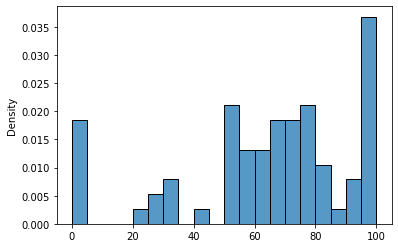

In [213]:
temp = faker_champ_stats['Wins'] / faker_champ_stats['Games'] * 100
wr_hist = sns.histplot(x=temp, stat='density', bins=20)

In [214]:
fig = wr_hist.get_figure()
fig.savefig("faker_wr_hist.jpg")